In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_znorm_rolling_avg_std_window_2049_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

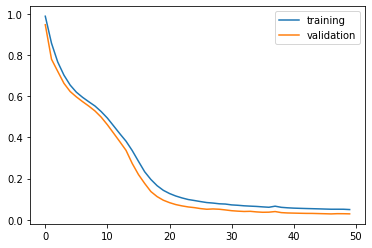

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [2 0 1]
group_bunches: [2065. 2318. 2034.]
group_bunches sorted: [2034. 2065. 2318.]
restore_index: [1 2 0]
group_bunches restored: [2065. 2318. 2034.]
bunch_sorted_index: [0 2 1]
group_bunches: [1379. 3309. 1574.]
group_bunches sorted: [1379. 1574. 3309.]
restore_index: [0 2 1]
group_bunches restored: [1379. 3309. 1574.]
bunch_sorted_index: [1 2 0]
group_bunches: [802. 271. 485.]
group_bunches sorted: [271. 485. 802.]
restore_index: [2 0 1]
group_bunches restored: [802. 271. 485.]
bunch_sorted_index: [2 1 0]
group_bunches: [3328. 2522. 1731.]
group_bunches sorted: [1731. 2522. 3328.]
restore_index: [2 1 0]
group_bunches restored: [3328. 2522. 1731.]
bunch_sorted_index: [1 0 2 3]
group_bunches: [ 940.  605. 2620. 2729.]
group_bunches sorted: [ 605.  940. 2620. 2729.]
restore_index: [1 0 2 3]
group_bunches restored: [ 940.  605. 2620. 2729.]

50/50 [==============================] - 60s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
585   Inst  6768     1     h  7 2018-06-08 07:54:55   
890   Inst  6890     1     h  7 2018-07-06 10:52:15   
7130  Inst  6918     1     h  7 2018-07-13 02:01:46   
6539  Inst  6572     1     h  7 2018-04-17 22:50:14   
2465  Inst  6276     1     h  7 2017-10-06 16:49:14   

                                                   file  n_bunches  \
585   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6768/...        252   
890   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...       1452   
7130  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6918/...       1212   
6539  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6572/...        372   
2465  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...       1868   

      bunch_index  bunch_number  ts_length  chunk  
585         105.0          37.0      65536      2  
890         162.0          52.0      65536      3  
7130        693.0         502.0      65536     27  
6539        282.0         148.0      65536     25  
2465       2252.0        1214.0      65536      9

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)

bunch_sorted_index: [0 1 2]
group_bunches: [ 439. 1298. 1795.]
group_bunches sorted: [ 439. 1298. 1795.]
restore_index: [0 1 2]
group_bunches restored: [ 439. 1298. 1795.]

5/5 [==============================] - 5s 996ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6700     1     h  7 2018-05-19 04:50:14   
1244  Inst  6752     1     h  7 2018-06-02 11:29:15   
5767  Inst  7054     1     h  7 2018-08-14 13:37:54   
7206  Inst  6429     1     h  7 2017-11-28 03:19:13   
7624  Inst  6700     1     h  7 2018-05-19 04:50:14   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6700/...       2556   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6752/...        540   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7054/...       1068   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6429/...        364   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6700/...       2556   

      bunch_index  bunch_number  ts_length  chunk  
4808        814.0         569.0      65536     18  
1244        167.0          92.0      65536      4  
5767        938.0         674.0      65536     22  
7206        412.0          63.0      65536     28  
7624        814.0         569.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

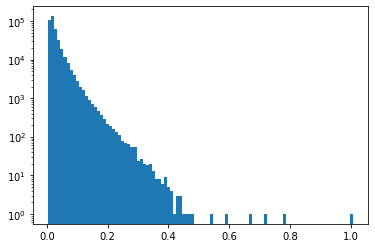

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

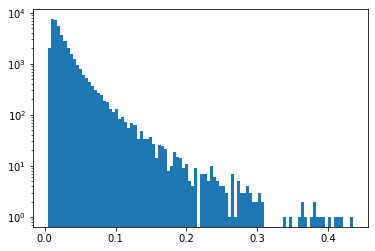

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.010231886684888957
type                                                         Inst
fill                                                         6768
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-08 07:54:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6768/...
n_bunches                                                     252
bunch_index                                                   105
bunch_number                                                   37
ts_length                                                   65536
chunk                                                           2
Name: 585, dtype: object


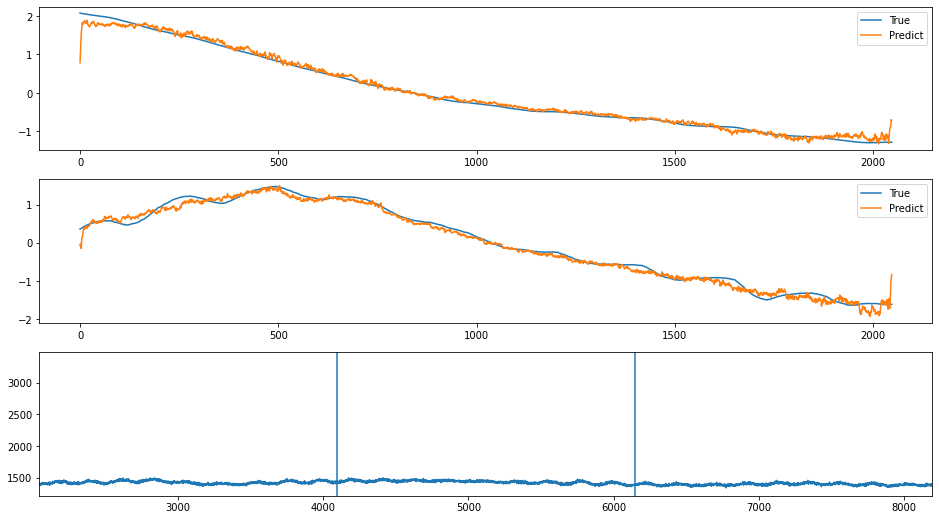

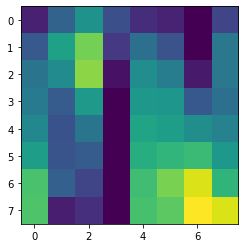

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 116591
Error: 0.004324400052451383
type                                                         Inst
fill                                                         6620
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-28 20:32:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6620/...
n_bunches                                                     650
bunch_index                                                   298
bunch_number                                                  160
ts_length                                                   65536
chunk                                                           4
Name: 1047, dtype: object


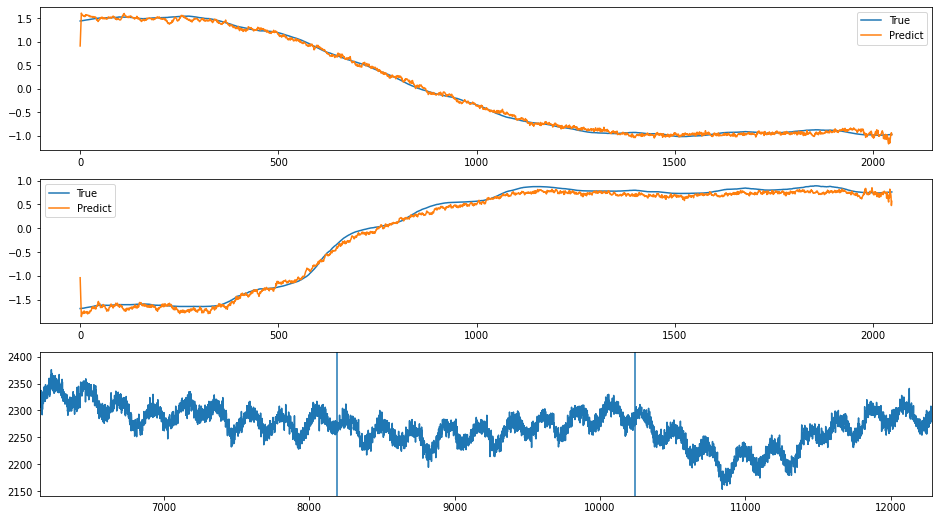

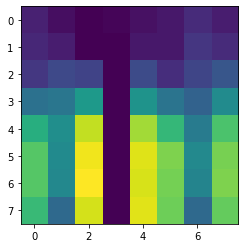

index: 273538
Error: 0.00434055254604086
type                                                         Inst
fill                                                         6710
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-21 12:30:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6710/...
n_bunches                                                     636
bunch_index                                                    87
bunch_number                                                   19
ts_length                                                   65536
chunk                                                          14
Name: 3591, dtype: object


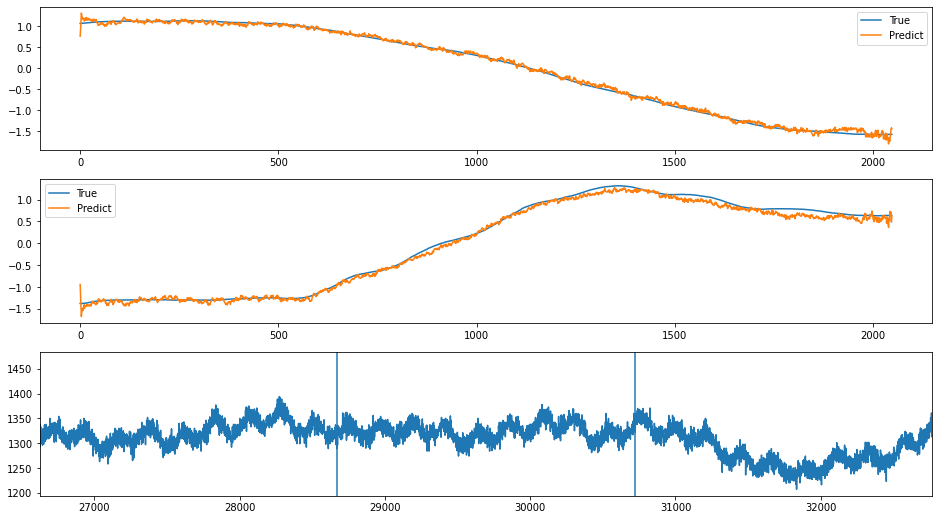

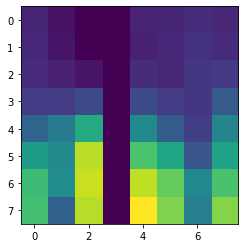

index: 165787
Error: 0.004373989300273929
type                                                         Inst
fill                                                         6868
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-30 10:57:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6868/...
n_bunches                                                     124
bunch_index                                                  3011
bunch_number                                                  119
ts_length                                                   65536
chunk                                                          28
Name: 7421, dtype: object


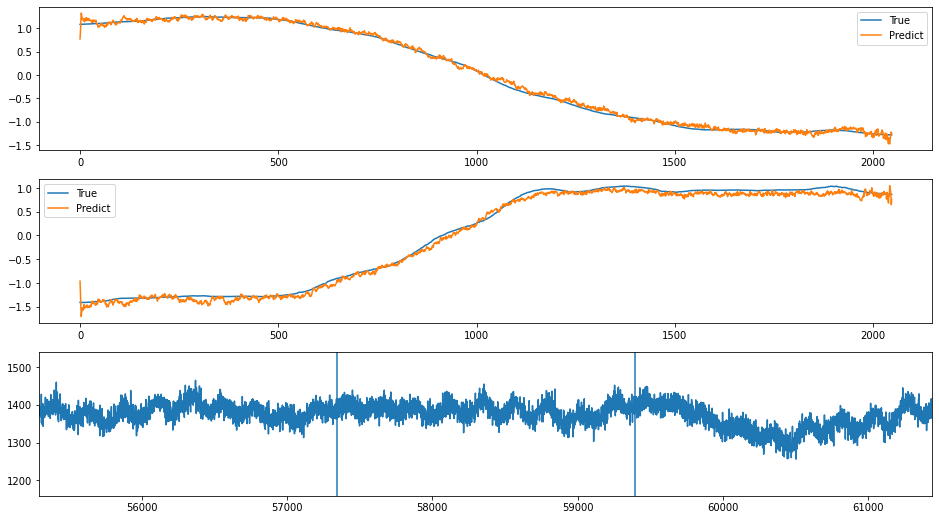

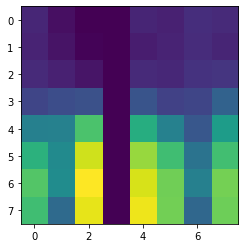

index: 166716
Error: 0.004444357903867394
type                                                         Inst
fill                                                         6276
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 13:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...
n_bunches                                                     428
bunch_index                                                   301
bunch_number                                                  160
ts_length                                                   65536
chunk                                                          23
Name: 5933, dtype: object


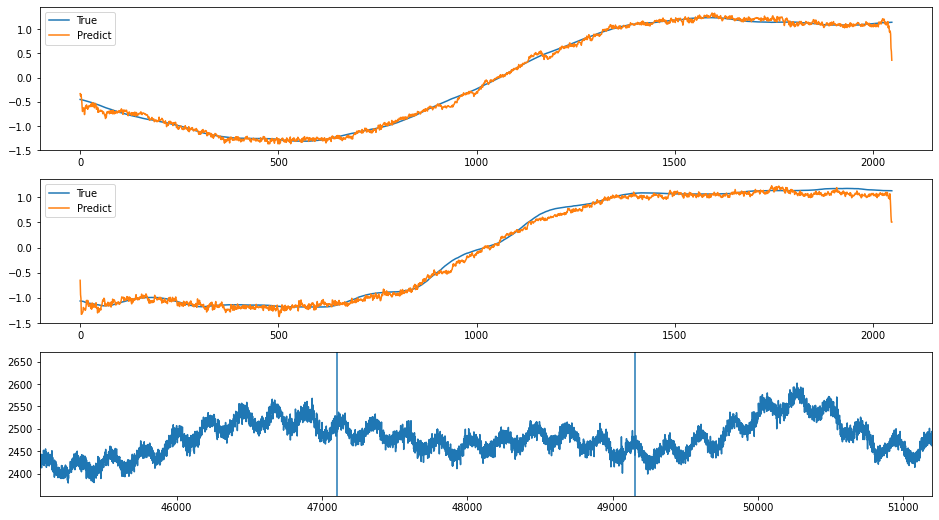

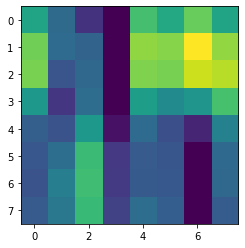

index: 96559
Error: 0.004528830253033771
type                                                         Inst
fill                                                         6710
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-21 12:30:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6710/...
n_bunches                                                     636
bunch_index                                                   244
bunch_number                                                  138
ts_length                                                   65536
chunk                                                          14
Name: 3627, dtype: object


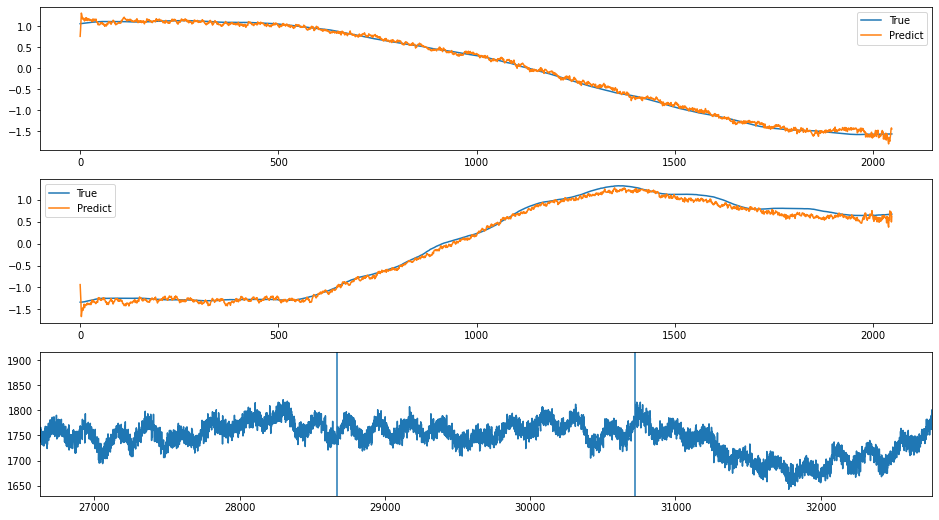

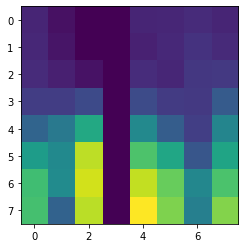

index: 62770
Error: 0.004554656442030286
type                                                         Inst
fill                                                         6620
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-28 20:32:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6620/...
n_bunches                                                     650
bunch_index                                                   500
bunch_number                                                  219
ts_length                                                   65536
chunk                                                           4
Name: 1156, dtype: object


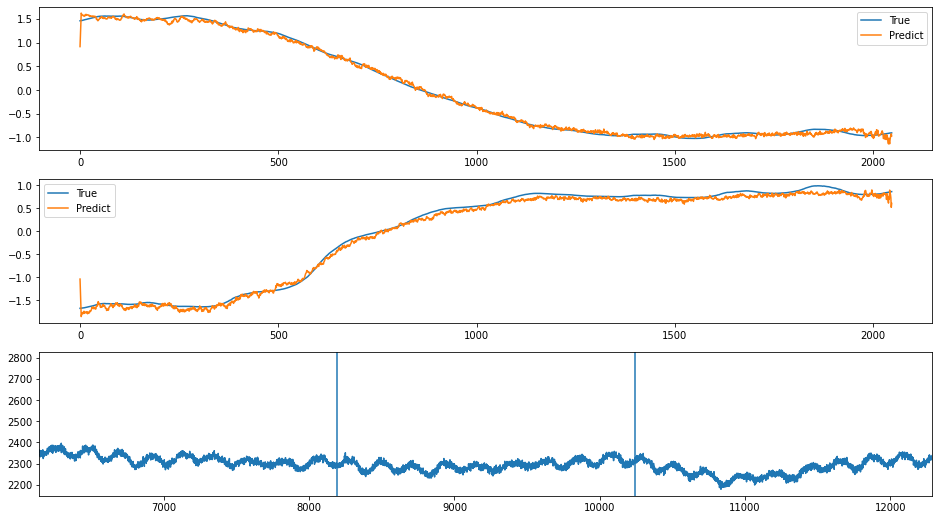

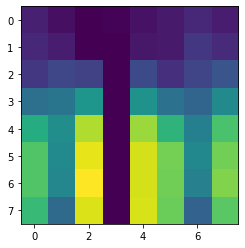

index: 301296
Error: 0.004599939415045818
type                                                         Inst
fill                                                         6685
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 09:00:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6685/...
n_bunches                                                     228
bunch_index                                                   272
bunch_number                                                   24
ts_length                                                   65536
chunk                                                           5
Name: 1323, dtype: object


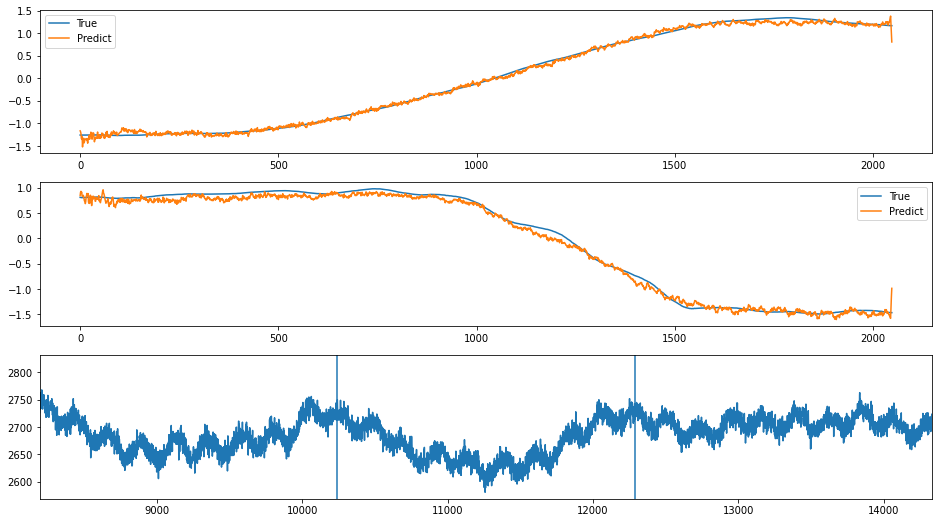

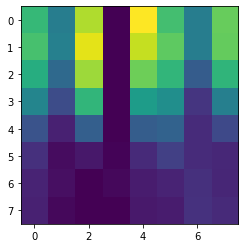

index: 293941
Error: 0.004695204764013189
type                                                         Inst
fill                                                         6685
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 09:00:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6685/...
n_bunches                                                     228
bunch_index                                                   272
bunch_number                                                   24
ts_length                                                   65536
chunk                                                          25
Name: 6443, dtype: object


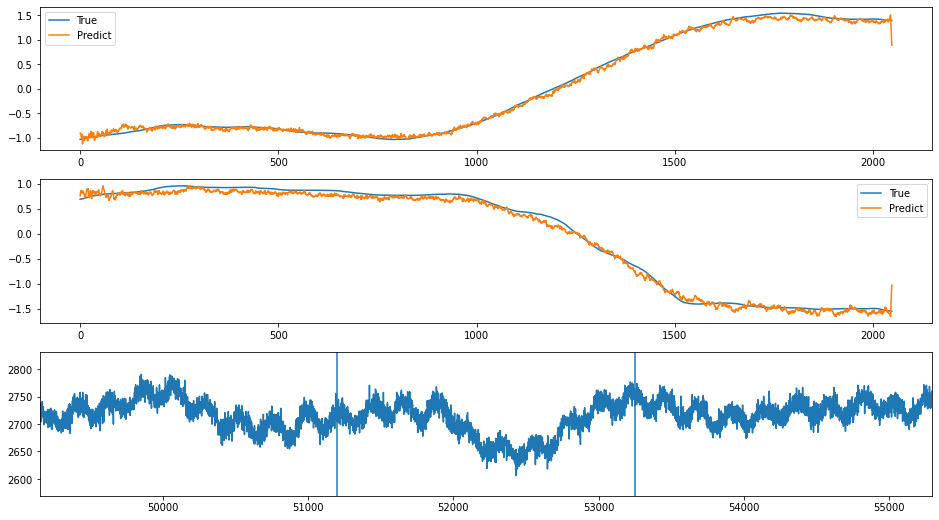

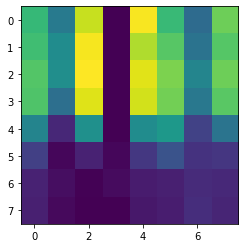

index: 151223
Error: 0.00476523199196742
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:37:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                  1560
bunch_number                                                   91
ts_length                                                   65536
chunk                                                          24
Name: 6302, dtype: object


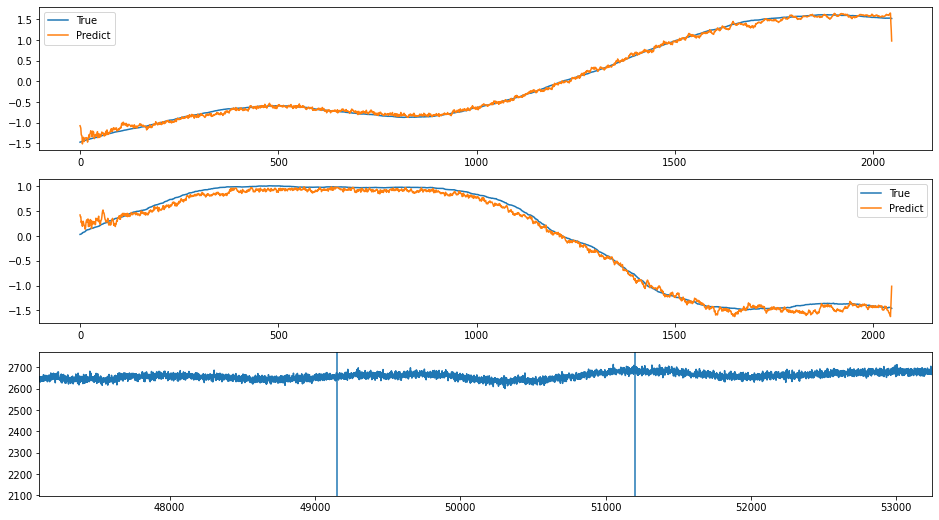

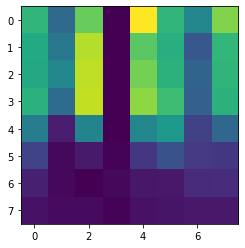

index: 150356
Error: 0.004813198230241774
type                                                         Inst
fill                                                         7176
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-15 13:01:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7176/...
n_bunches                                                     156
bunch_index                                                   260
bunch_number                                                   70
ts_length                                                   65536
chunk                                                          10
Name: 2719, dtype: object


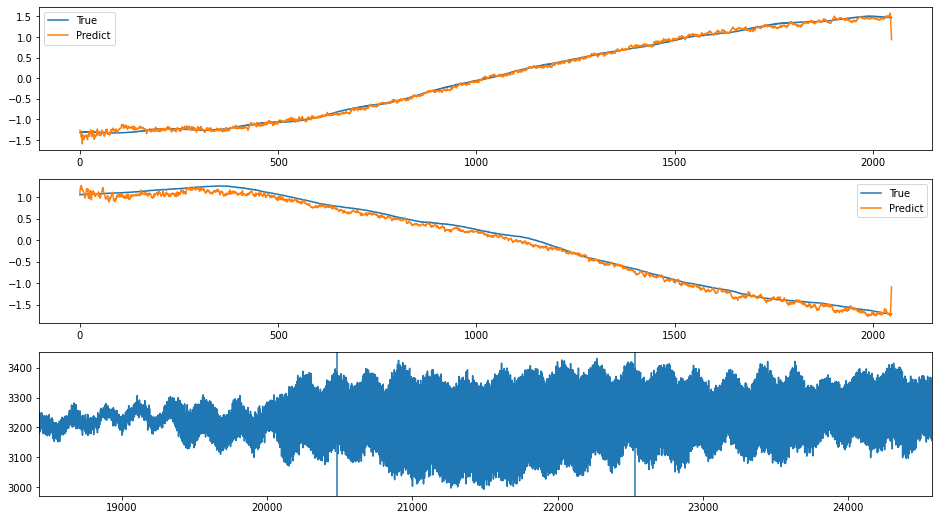

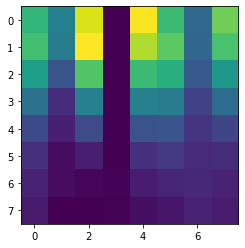

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 369031
Error: 1.006863656745493
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 06:19:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1300
bunch_index                                                  2285
bunch_number                                                 1263
ts_length                                                   65536
chunk                                                           3
Name: 916, dtype: object


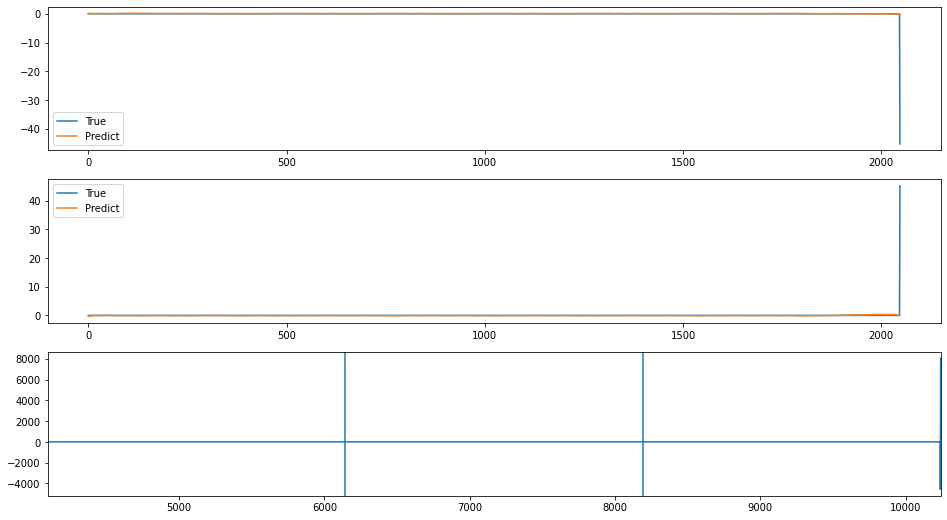

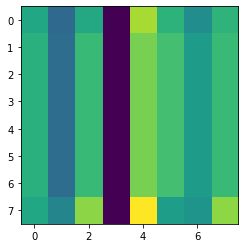

index: 75111
Error: 0.7833483745327642
type                                                         Inst
fill                                                         6399
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-20 12:32:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6399/...
n_bunches                                                     780
bunch_index                                                  1652
bunch_number                                                  675
ts_length                                                   65536
chunk                                                           3
Name: 817, dtype: object


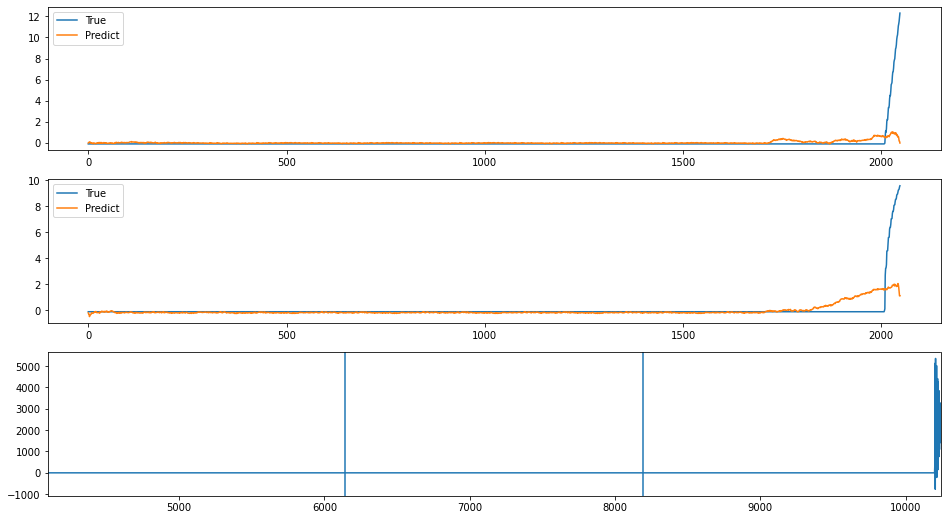

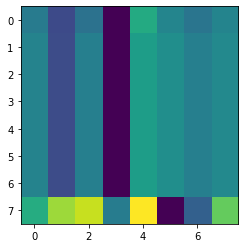

index: 364299
Error: 0.7226193792588457
type                                                         Inst
fill                                                         6274
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 18:44:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6274/...
n_bunches                                                     172
bunch_index                                                   159
bunch_number                                                   71
ts_length                                                   65536
chunk                                                           4
Name: 1144, dtype: object


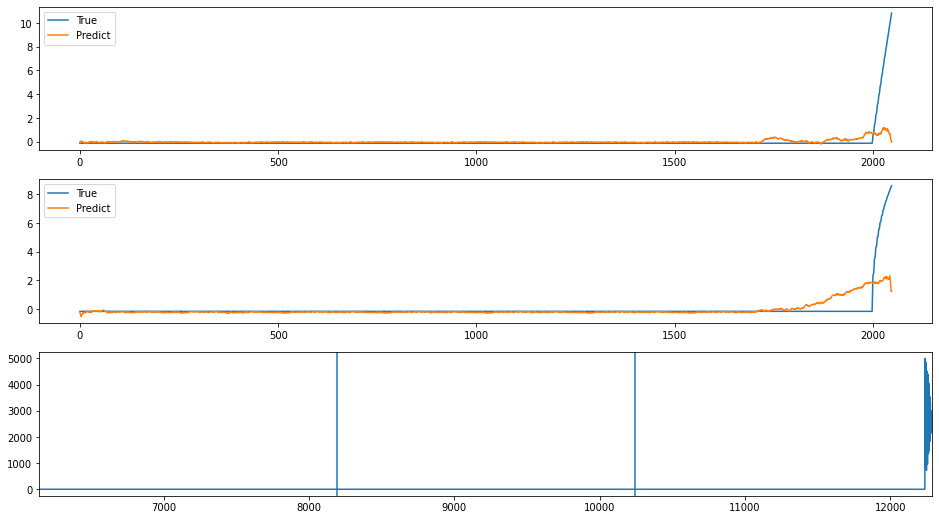

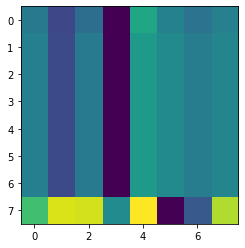

index: 145900
Error: 0.6673326437509539
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 01:30:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     152
bunch_index                                                  1009
bunch_number                                                  100
ts_length                                                   65536
chunk                                                           4
Name: 1192, dtype: object


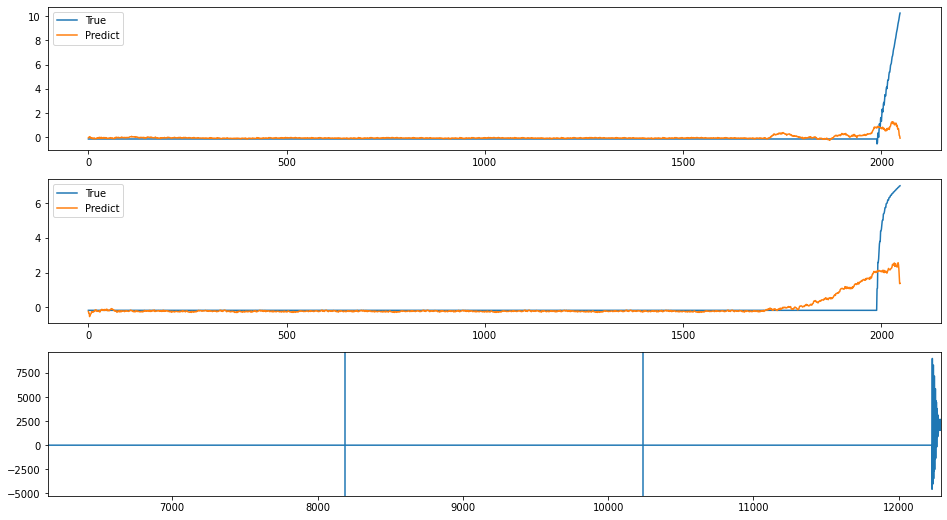

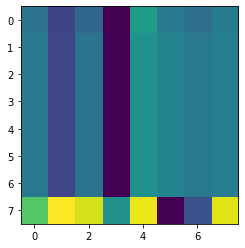

index: 11861
Error: 0.5917322086285682
type                                                         Inst
fill                                                         7346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 08:00:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7346/...
n_bunches                                                     636
bunch_index                                                   831
bunch_number                                                  598
ts_length                                                   65536
chunk                                                           8
Name: 2293, dtype: object


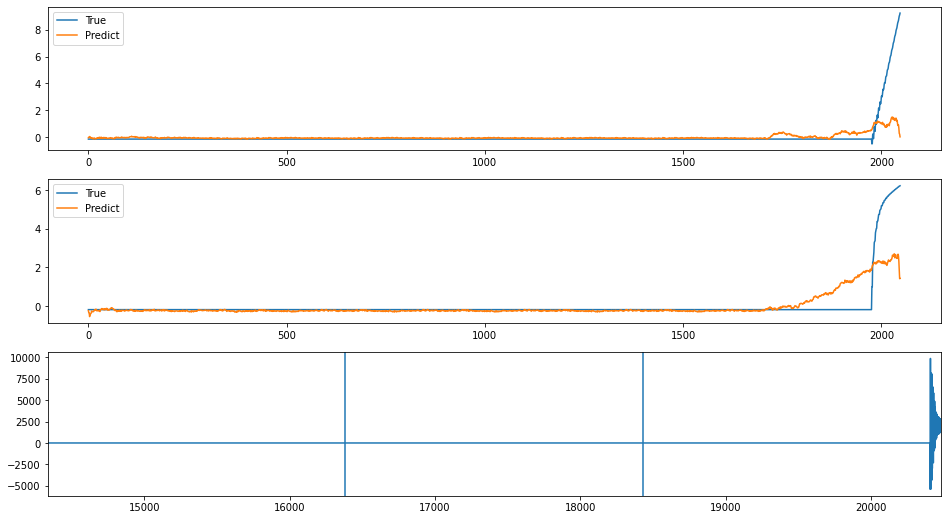

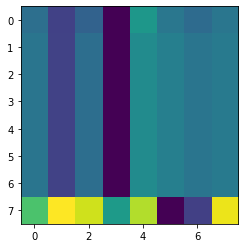

index: 241611
Error: 0.5383788613592935
type                                                         Inst
fill                                                         6355
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 18:21:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6355/...
n_bunches                                                     780
bunch_index                                                  1362
bunch_number                                                  738
ts_length                                                   65536
chunk                                                           3
Name: 825, dtype: object


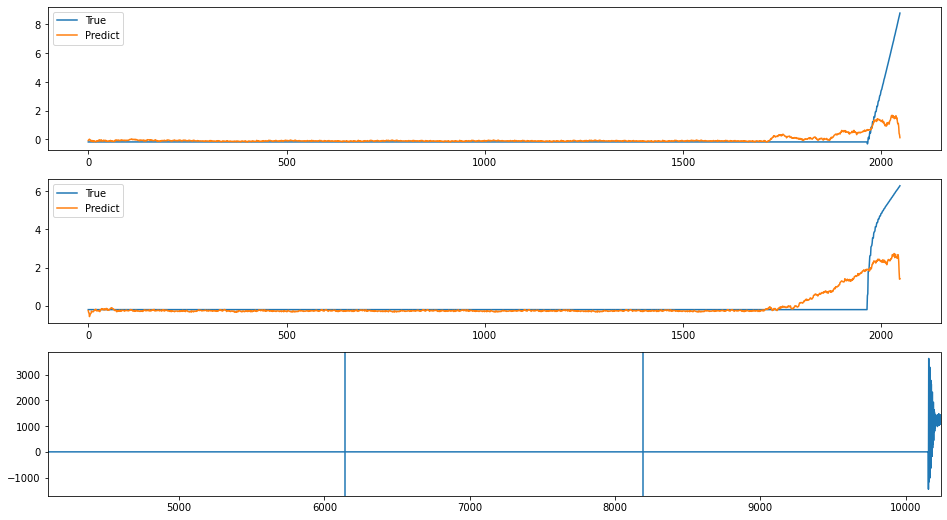

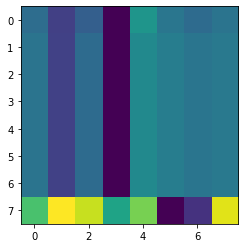

index: 236834
Error: 0.47585143504265853
type                                                         Inst
fill                                                         6755
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-03 17:22:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6755/...
n_bunches                                                     108
bunch_index                                                   161
bunch_number                                                   86
ts_length                                                   65536
chunk                                                           9
Name: 2313, dtype: object


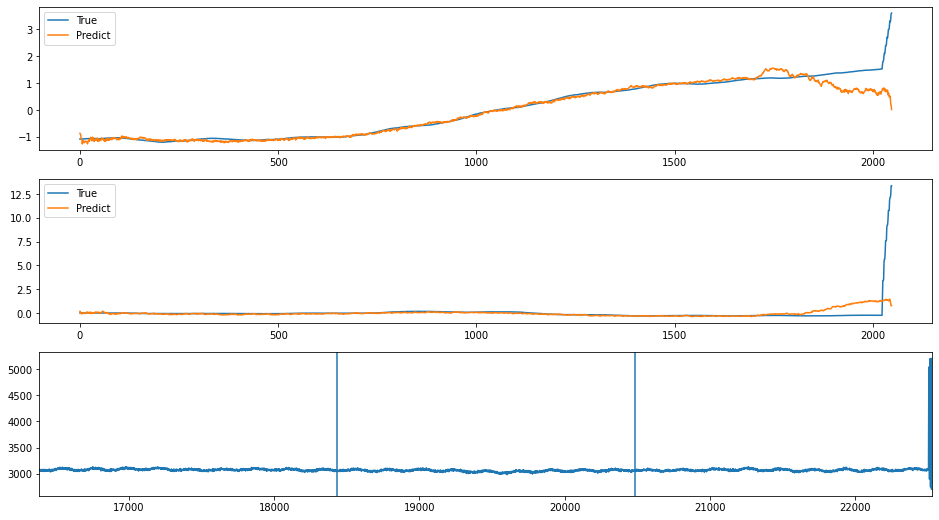

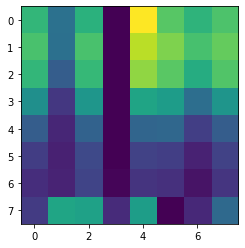

index: 85891
Error: 0.47436788340348623
type                                                         Inst
fill                                                         6398
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-19 21:07:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6398/...
n_bunches                                                     524
bunch_index                                                  1183
bunch_number                                                  514
ts_length                                                   65536
chunk                                                           2
Name: 710, dtype: object


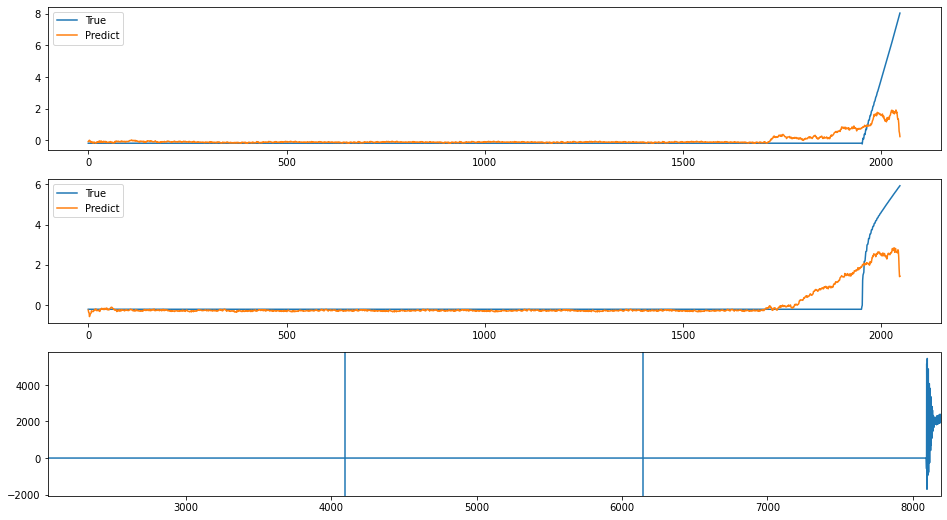

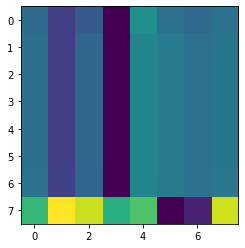

index: 269068
Error: 0.4586253621437685
type                                                         Inst
fill                                                         6247
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-27 07:35:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6247/...
n_bunches                                                     404
bunch_index                                                   609
bunch_number                                                  328
ts_length                                                   65536
chunk                                                           1
Name: 371, dtype: object


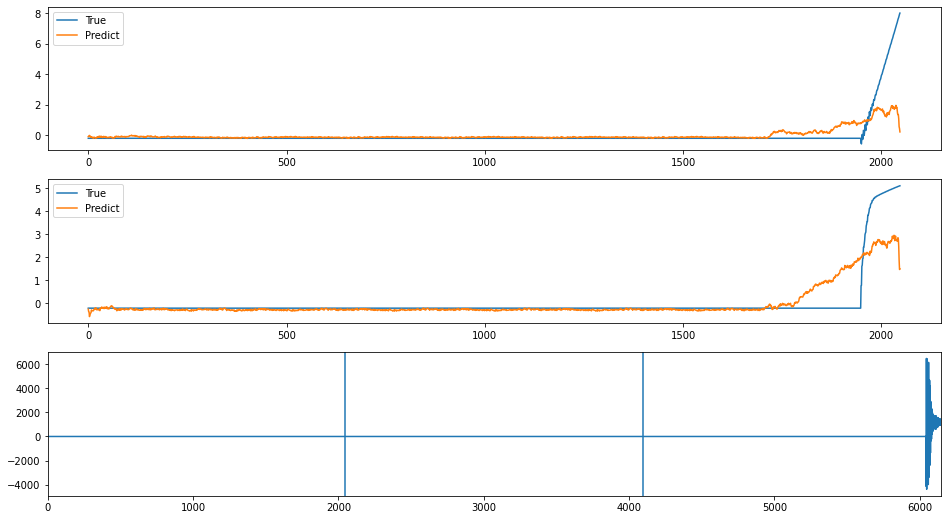

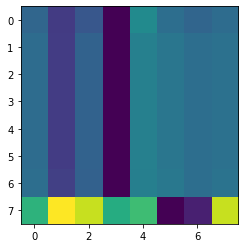

index: 86481
Error: 0.4537053838911008
type                                                         Inst
fill                                                         6390
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-15 15:28:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...
n_bunches                                                     140
bunch_index                                                   147
bunch_number                                                   38
ts_length                                                   65536
chunk                                                          10
Name: 2687, dtype: object


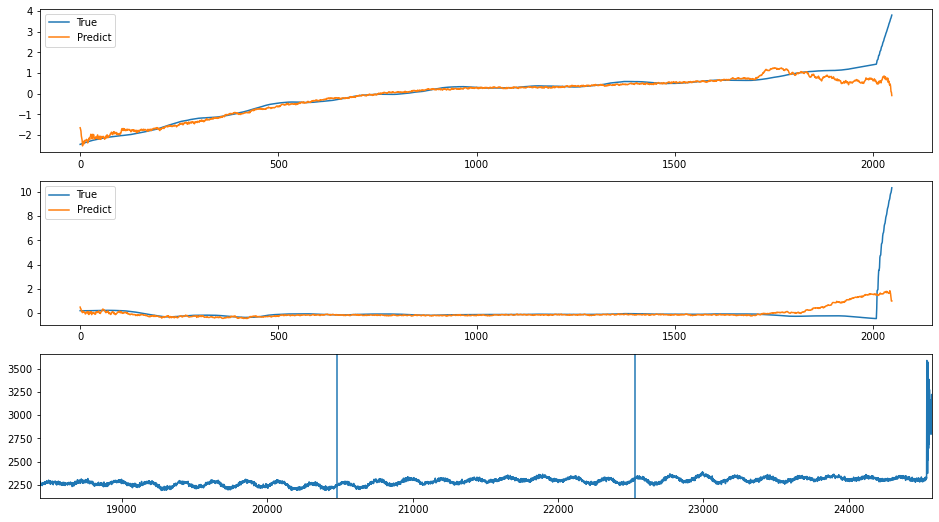

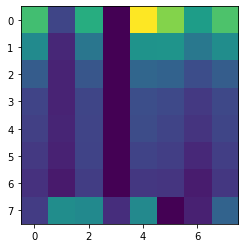

index: 94913
Error: 0.44506954489872275
type                                                         Inst
fill                                                         7306
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-15 05:57:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7306/...
n_bunches                                                      24
bunch_index                                                    99
bunch_number                                                   18
ts_length                                                   65536
chunk                                                          10
Name: 2610, dtype: object


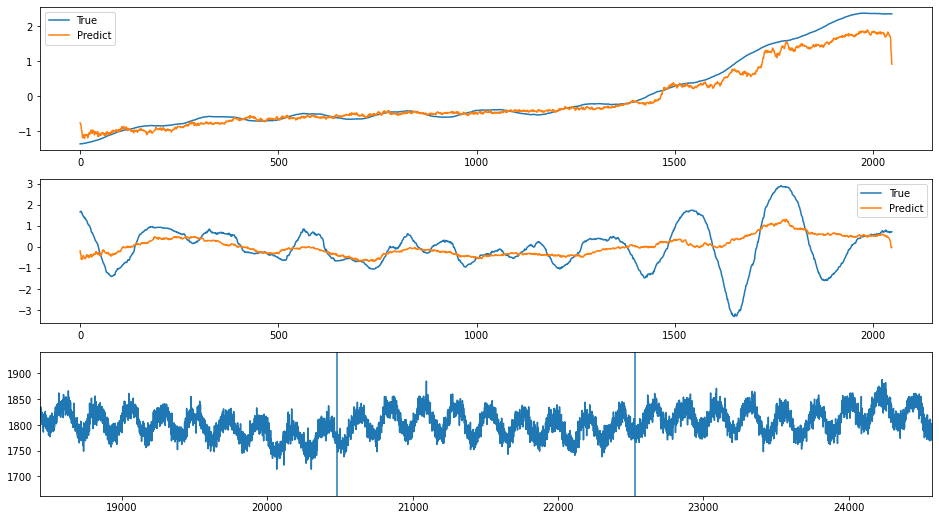

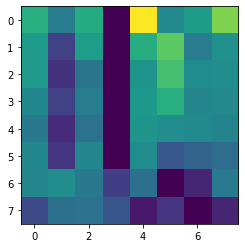

index: 97683
Error: 0.4392185465151275
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:51:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          20
Name: 5213, dtype: object


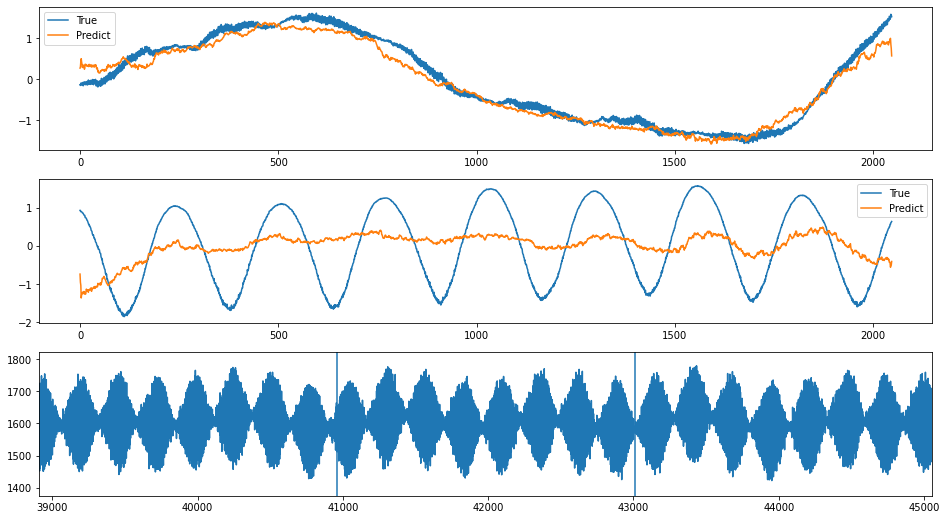

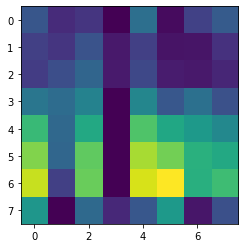

index: 245120
Error: 0.438177403106821
type                                                         Inst
fill                                                         6598
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 12:10:47
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6598/...
n_bunches                                                     516
bunch_index                                                   515
bunch_number                                                  409
ts_length                                                   65536
chunk                                                          16
Name: 4110, dtype: object


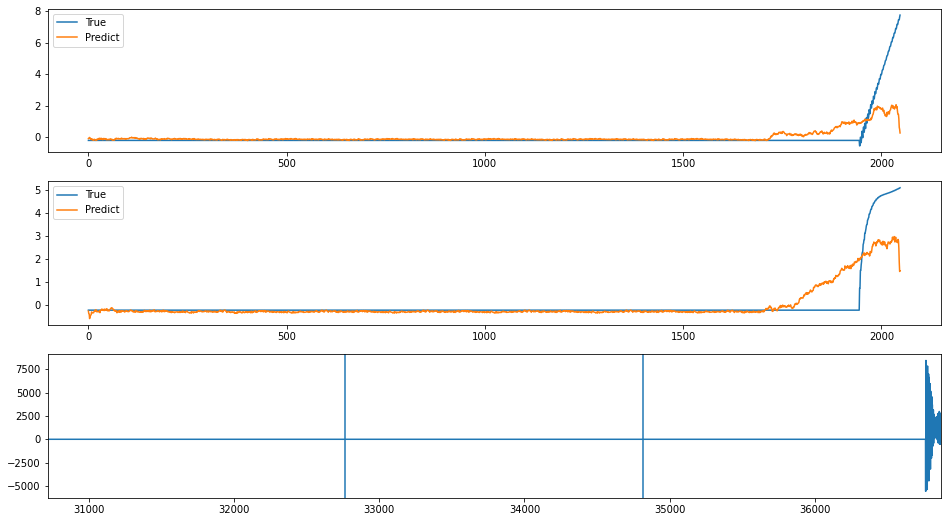

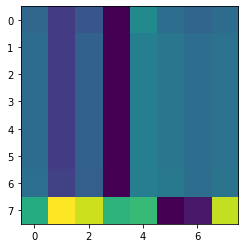

index: 357959
Error: 0.4331148688478783
type                                                         Inst
fill                                                         7114
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-01 21:26:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7114/...
n_bunches                                                     540
bunch_index                                                   696
bunch_number                                                  505
ts_length                                                   65536
chunk                                                           9
Name: 2422, dtype: object


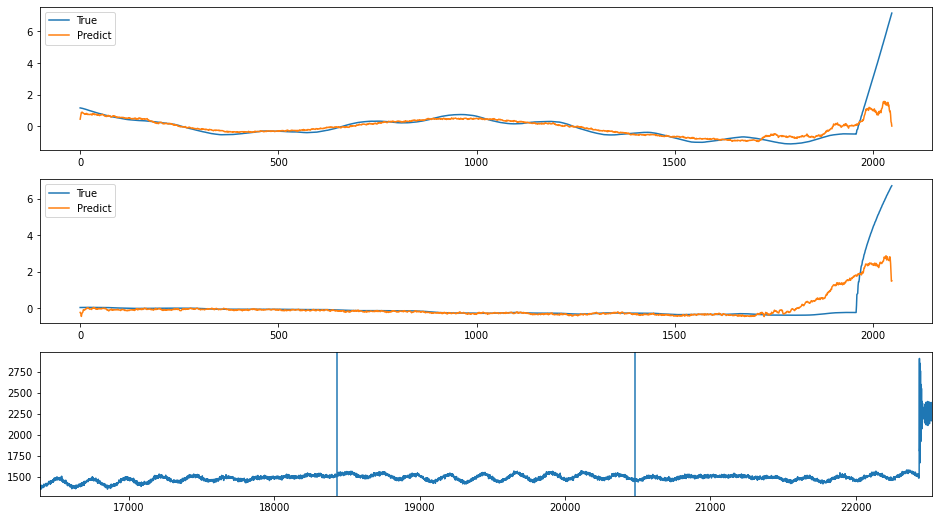

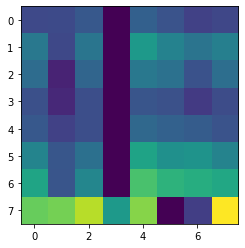

index: 100117
Error: 0.42834647682009397
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:51:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          24
Name: 6237, dtype: object


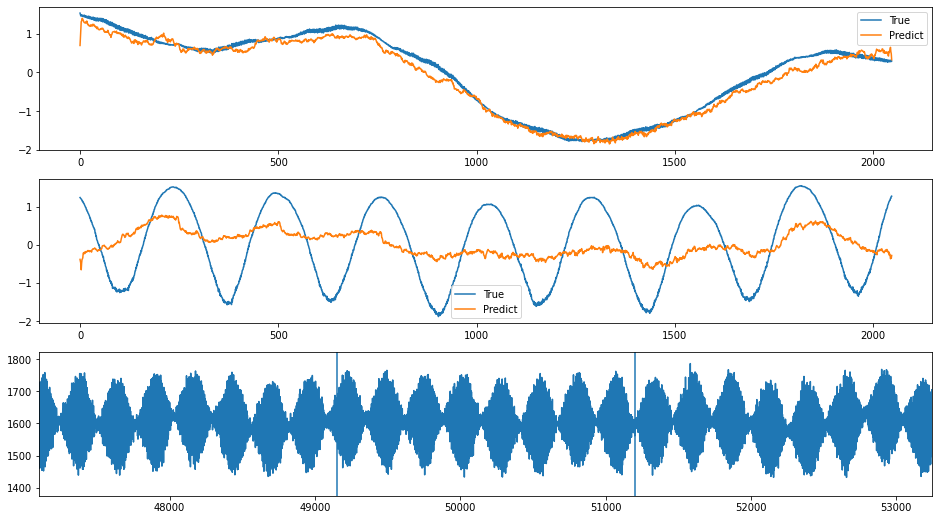

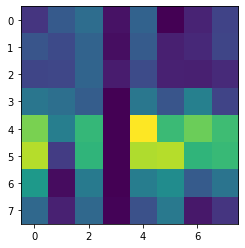

index: 347571
Error: 0.42727277205482617
type                                                         Inst
fill                                                         7099
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-29 15:05:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7099/...
n_bunches                                                     780
bunch_index                                                   589
bunch_number                                                  412
ts_length                                                   65536
chunk                                                          13
Name: 3431, dtype: object


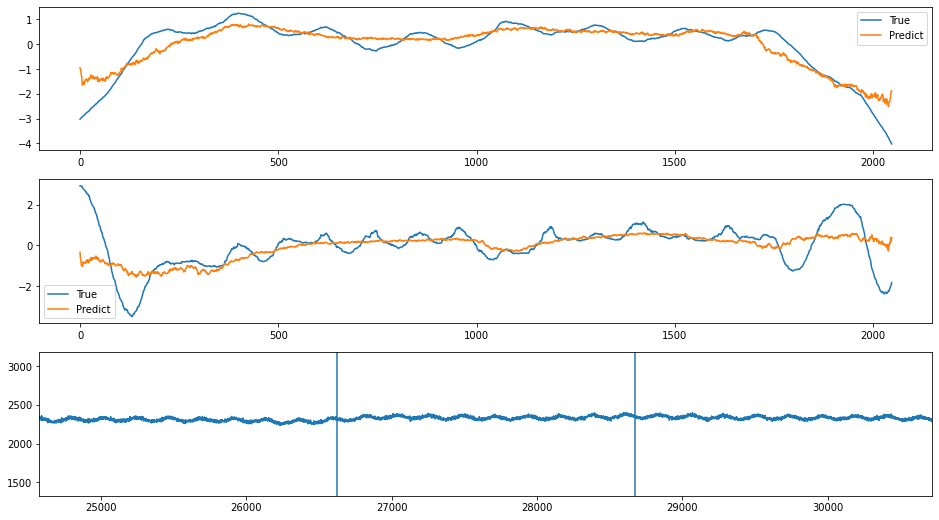

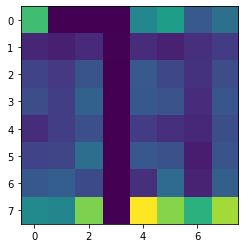

index: 98937
Error: 0.42050654592267844
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:51:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          30
Name: 7773, dtype: object


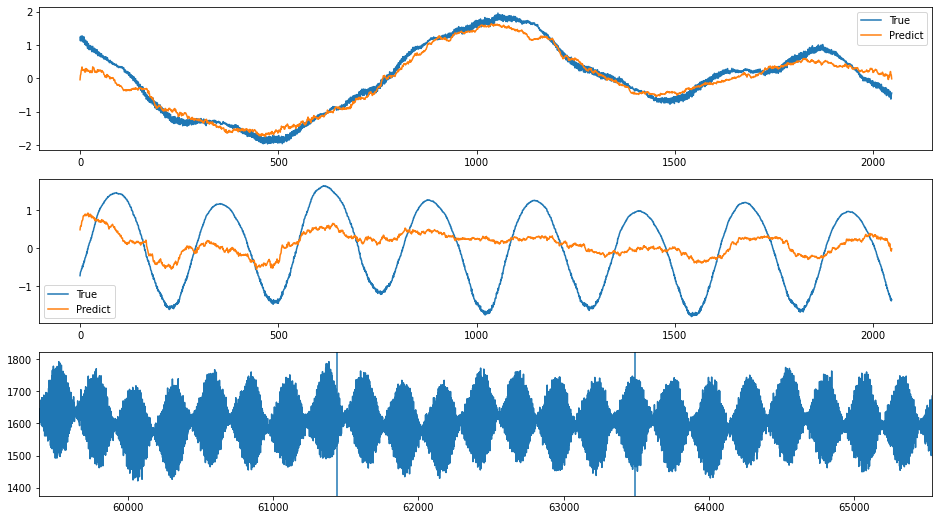

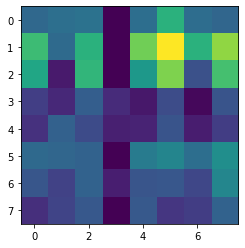

index: 160057
Error: 0.41399814274295826
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:59:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                    69
bunch_number                                                   10
ts_length                                                   65536
chunk                                                          19
Name: 5057, dtype: object


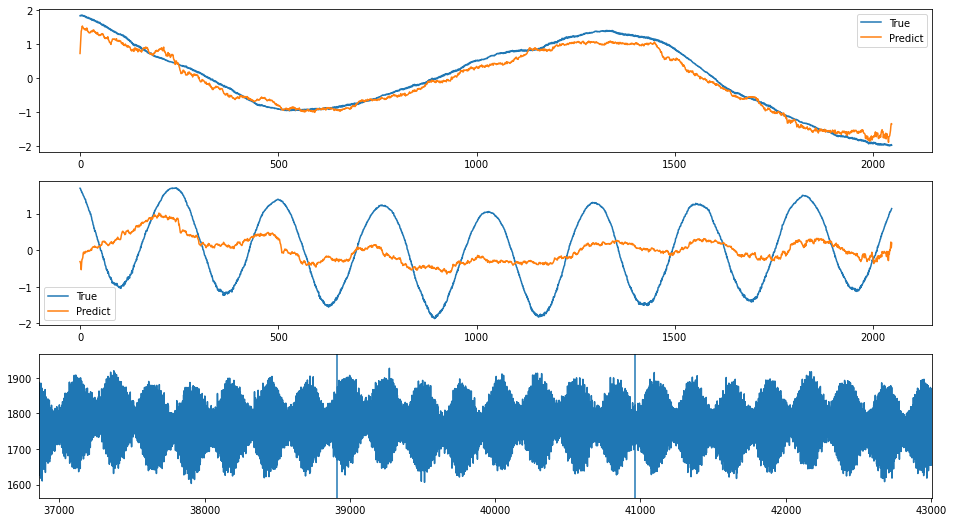

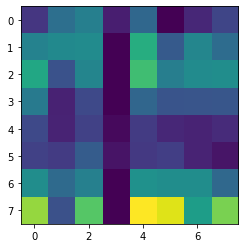

index: 296970
Error: 0.4127281708798476
type                                                         Inst
fill                                                         6990
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 10:00:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6990/...
n_bunches                                                     444
bunch_index                                                   643
bunch_number                                                  363
ts_length                                                   65536
chunk                                                           5
Name: 1461, dtype: object


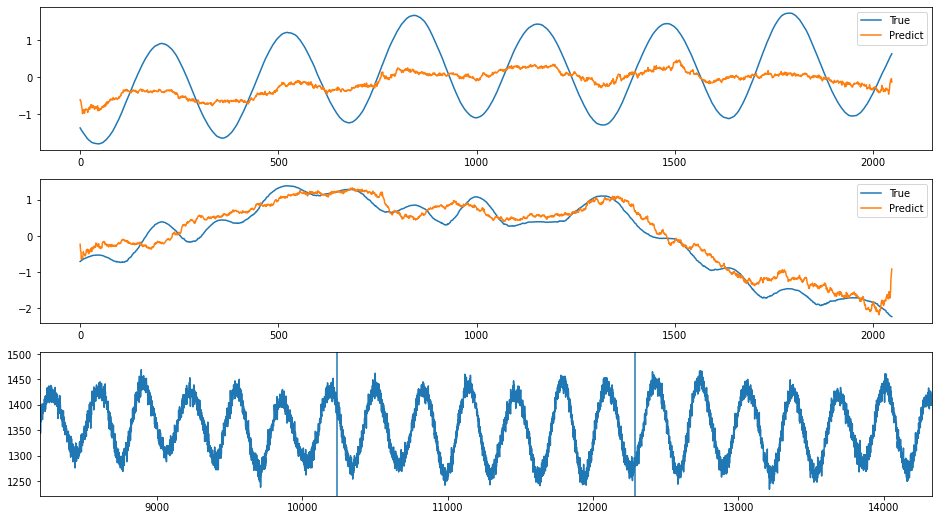

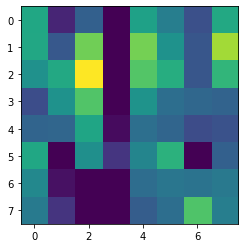

index: 190341
Error: 0.40933497951112374
type                                                         Inst
fill                                                         7158
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-13 04:31:04
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7158/...
n_bunches                                                    1884
bunch_index                                                   274
bunch_number                                                  180
ts_length                                                   65536
chunk                                                           8
Name: 2269, dtype: object


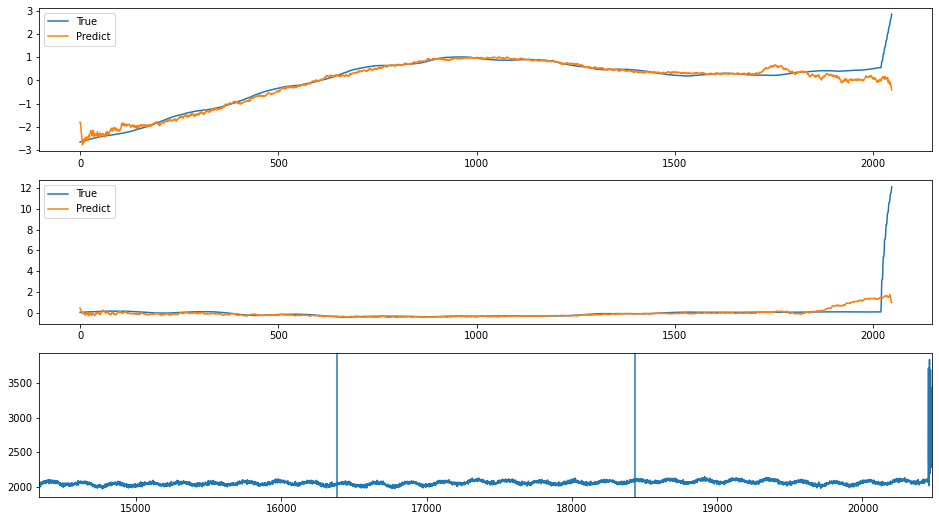

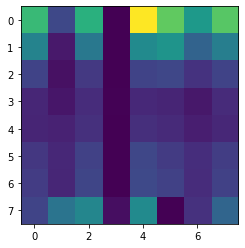

index: 198109
Error: 0.4089004402509177
type                                                         Inst
fill                                                         6343
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 06:53:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6343/...
n_bunches                                                     908
bunch_index                                                   641
bunch_number                                                  342
ts_length                                                   65536
chunk                                                          13
Name: 3354, dtype: object


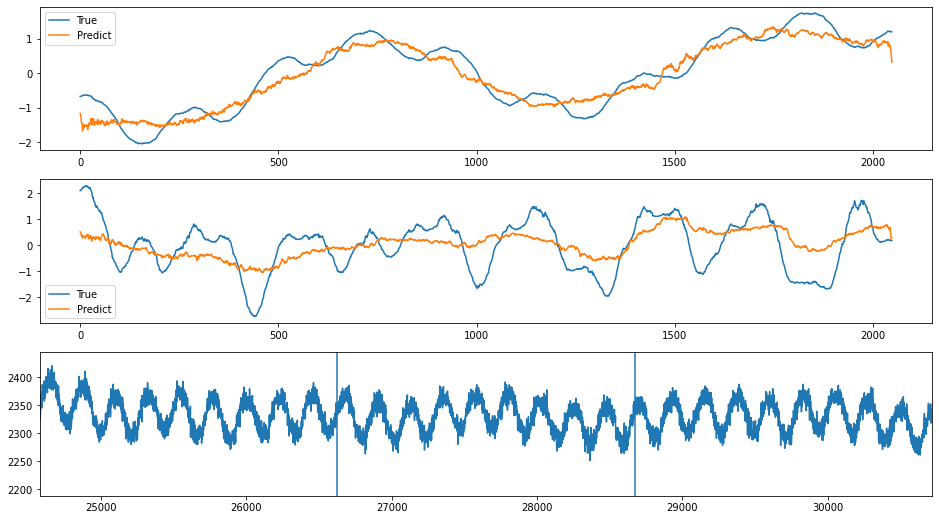

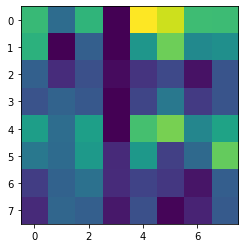

index: 84813
Error: 0.4023323920788622
type                                                         Inst
fill                                                         6343
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 06:53:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6343/...
n_bunches                                                     908
bunch_index                                                  1635
bunch_number                                                  892
ts_length                                                   65536
chunk                                                          13
Name: 3357, dtype: object


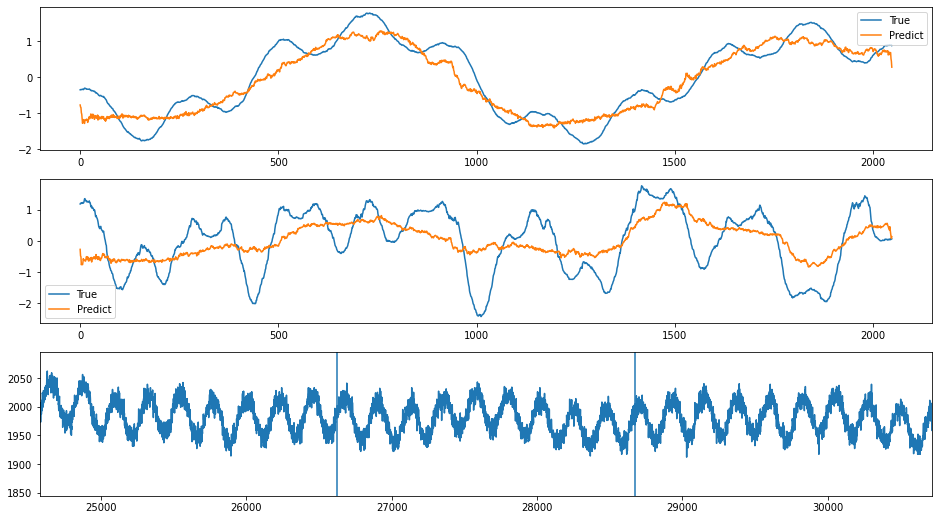

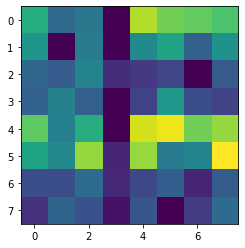

index: 100005
Error: 0.40122071243083424
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:51:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          22
Name: 5725, dtype: object


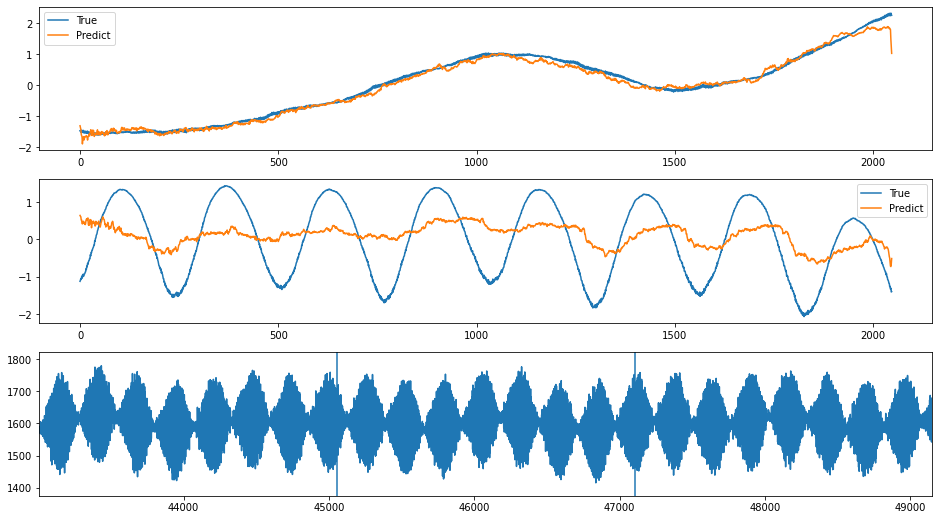

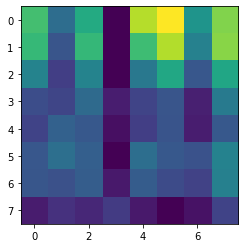

index: 106037
Error: 0.3996188661747199
type                                                         Inst
fill                                                         7304
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-15 02:42:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7304/...
n_bunches                                                      75
bunch_index                                                  1634
bunch_number                                                   32
ts_length                                                   65536
chunk                                                           9
Name: 2325, dtype: object


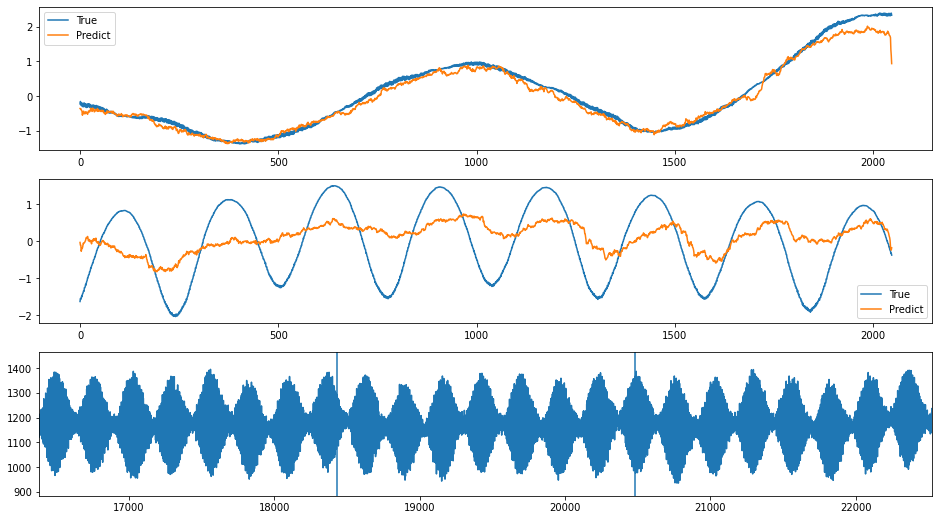

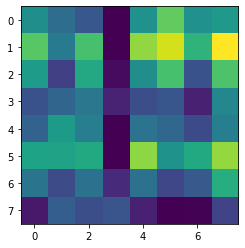

index: 111069
Error: 0.3981275992688665
type                                                         Inst
fill                                                         7304
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-15 02:42:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7304/...
n_bunches                                                      75
bunch_index                                                  1634
bunch_number                                                   32
ts_length                                                   65536
chunk                                                          18
Name: 4629, dtype: object


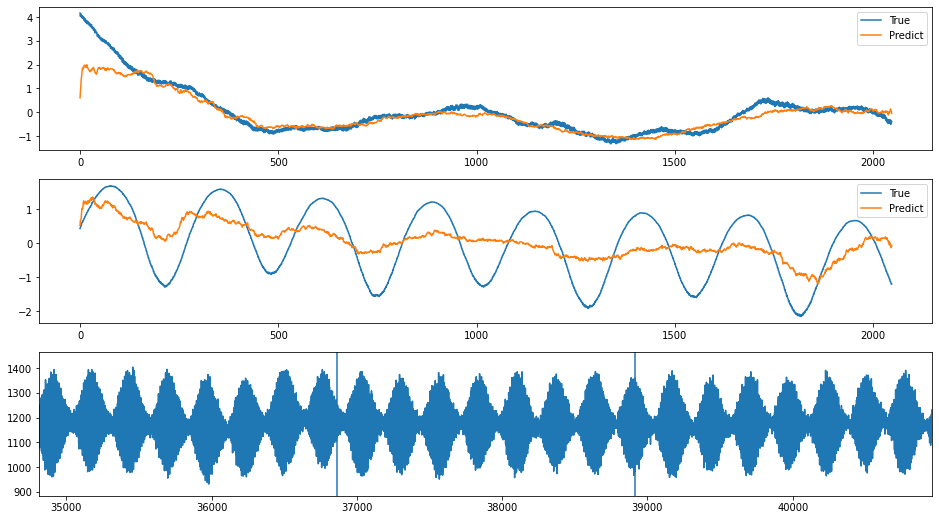

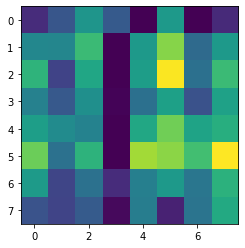

index: 330707
Error: 0.39691862846829495
type                                                         Inst
fill                                                         6217
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 10:31:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6217/...
n_bunches                                                      61
bunch_index                                                   110
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          24
Name: 6187, dtype: object


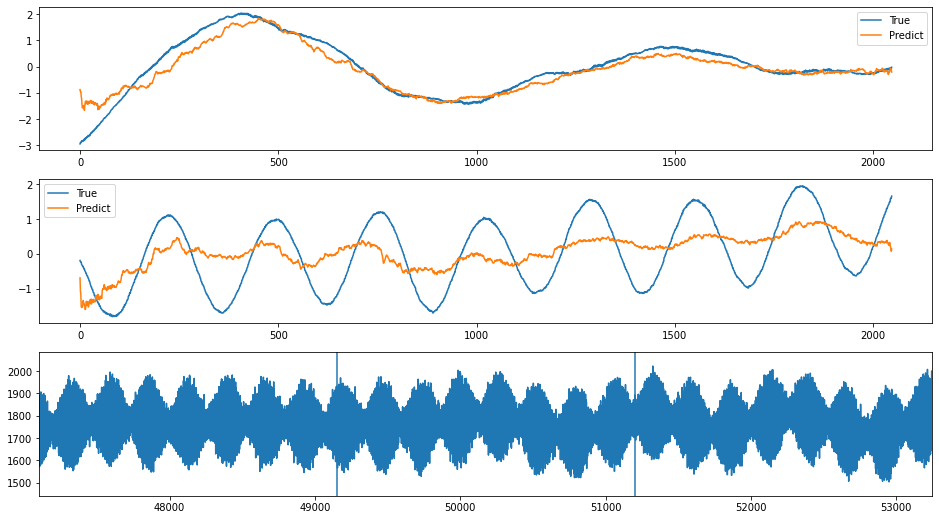

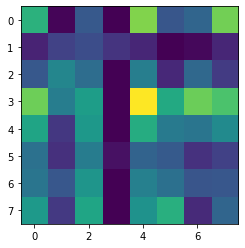

index: 240809
Error: 0.3939337610583065
type                                                         Inst
fill                                                         7158
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-13 04:31:04
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7158/...
n_bunches                                                    1884
bunch_index                                                   264
bunch_number                                                  170
ts_length                                                   65536
chunk                                                           8
Name: 2249, dtype: object


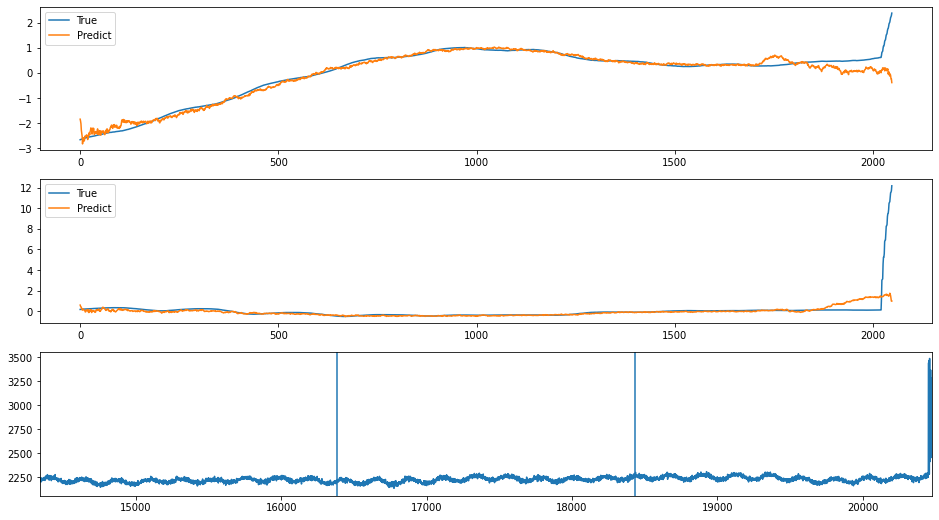

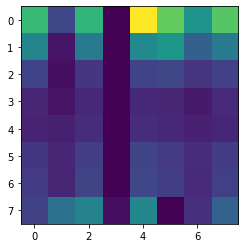

index: 14350
Error: 0.3931486544999962
type                                                         Inst
fill                                                         6984
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-26 22:35:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6984/...
n_bunches                                                     286
bunch_index                                                   433
bunch_number                                                   95
ts_length                                                   65536
chunk                                                           5
Name: 1285, dtype: object


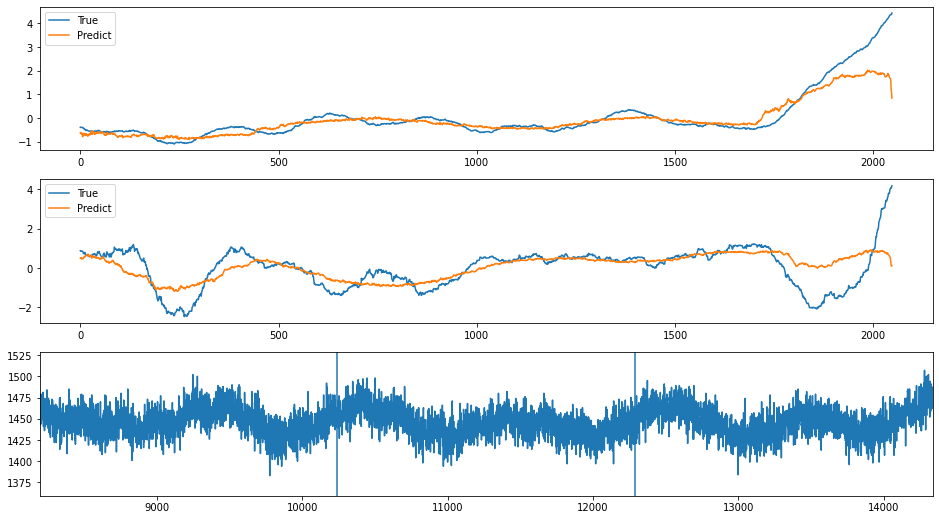

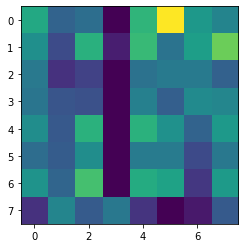

index: 15744
Error: 0.3927265980705696
type                                                         Inst
fill                                                         6939
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-17 23:40:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6939/...
n_bunches                                                     843
bunch_index                                                  2937
bunch_number                                                  819
ts_length                                                   65536
chunk                                                          10
Name: 2618, dtype: object


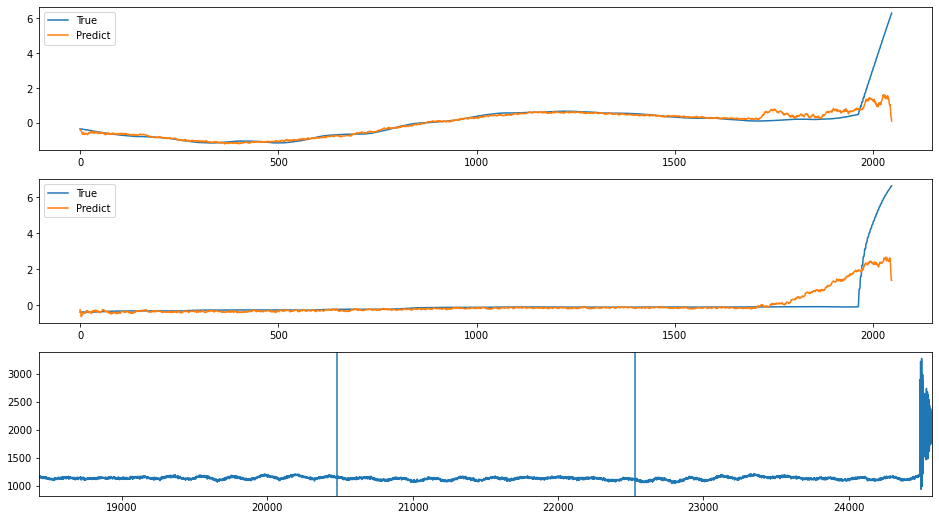

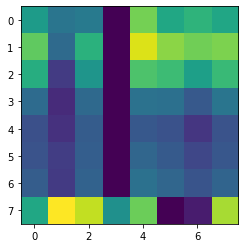

index: 160665
Error: 0.3924558511089219
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:59:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                    69
bunch_number                                                   10
ts_length                                                   65536
chunk                                                          30
Name: 7873, dtype: object


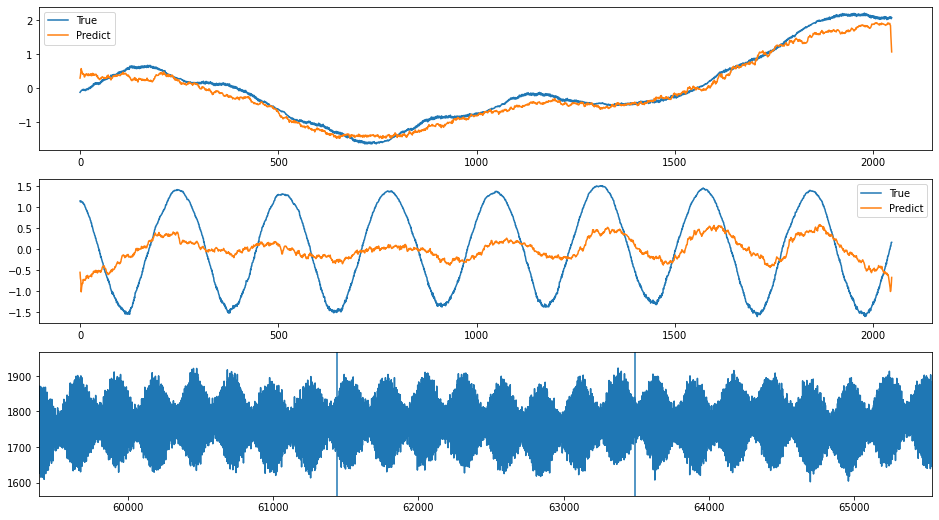

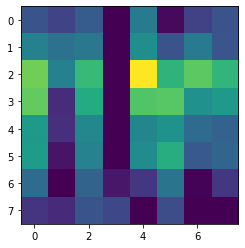

index: 212431
Error: 0.3917422189692652
type                                                         Inst
fill                                                         6605
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 22:31:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6605/...
n_bunches                                                    1380
bunch_index                                                  1578
bunch_number                                                 1286
ts_length                                                   65536
chunk                                                          22
Name: 5816, dtype: object


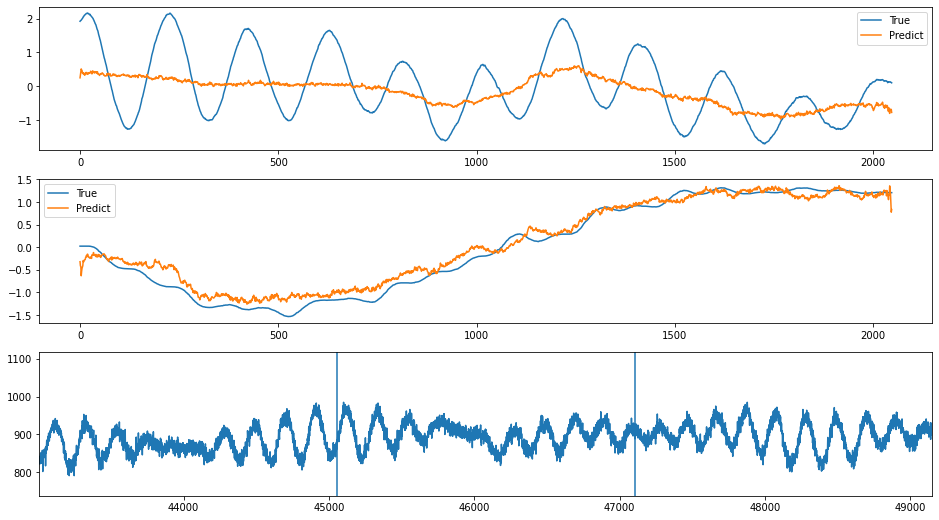

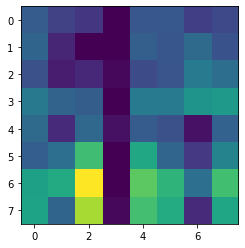

index: 110985
Error: 0.38995840656311287
type                                                         Inst
fill                                                         7304
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-15 02:42:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7304/...
n_bunches                                                      75
bunch_index                                                  1634
bunch_number                                                   32
ts_length                                                   65536
chunk                                                          29
Name: 7445, dtype: object


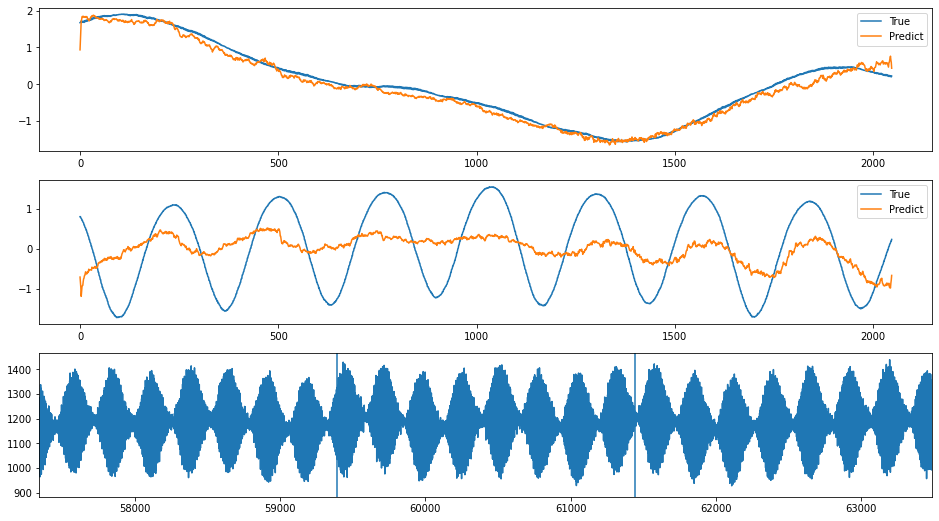

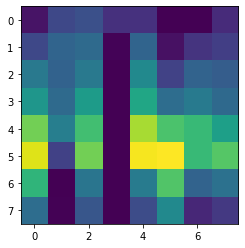

index: 95242
Error: 0.38638215014949673
type                                                         Inst
fill                                                         6748
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-01 01:08:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6748/...
n_bunches                                                     924
bunch_index                                                  1144
bunch_number                                                  816
ts_length                                                   65536
chunk                                                          22
Name: 5756, dtype: object


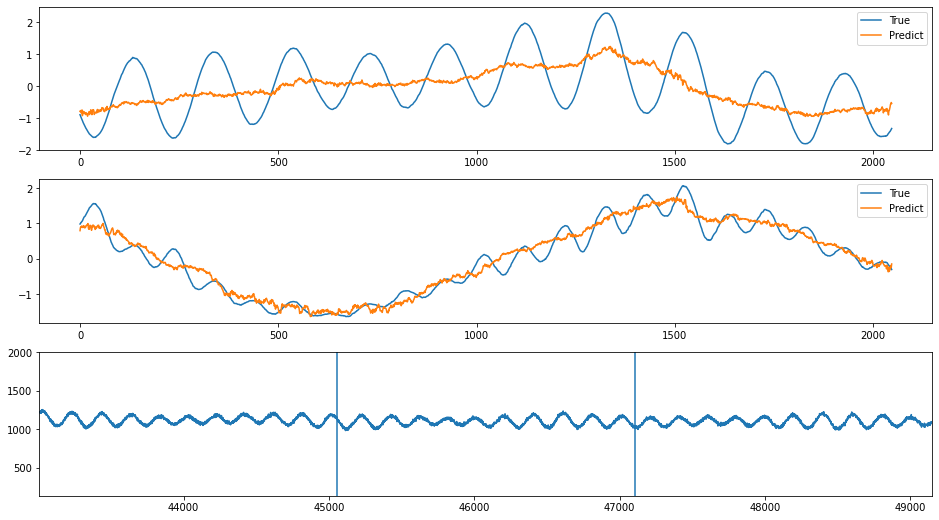

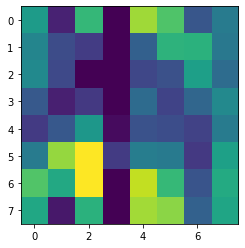

index: 328217
Error: 0.38590087505054843
type                                                         Inst
fill                                                         6746
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-31 15:56:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6746/...
n_bunches                                                     636
bunch_index                                                   856
bunch_number                                                  604
ts_length                                                   65536
chunk                                                          23
Name: 5990, dtype: object


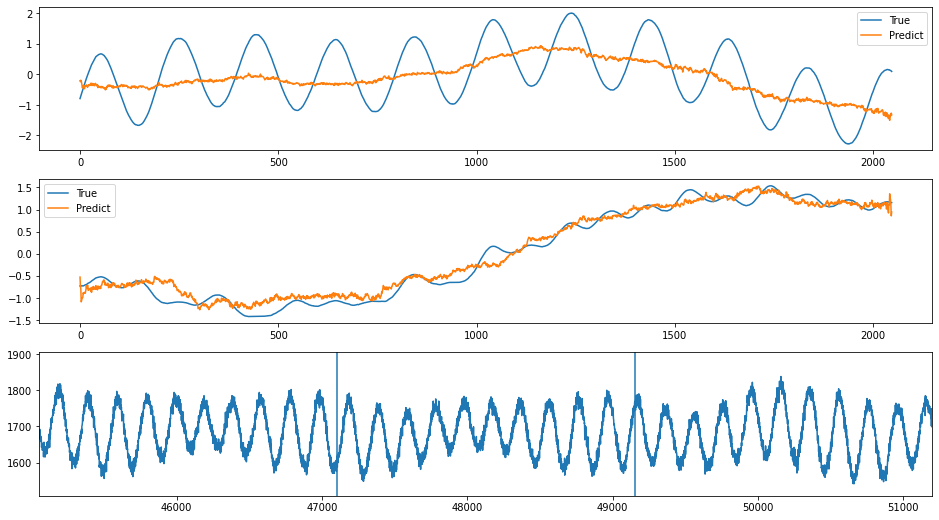

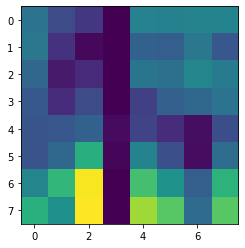

index: 338919
Error: 0.38534641610943277
type                                                         Inst
fill                                                         7040
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-09 19:13:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7040/...
n_bunches                                                     780
bunch_index                                                   777
bunch_number                                                  551
ts_length                                                   65536
chunk                                                          17
Name: 4603, dtype: object


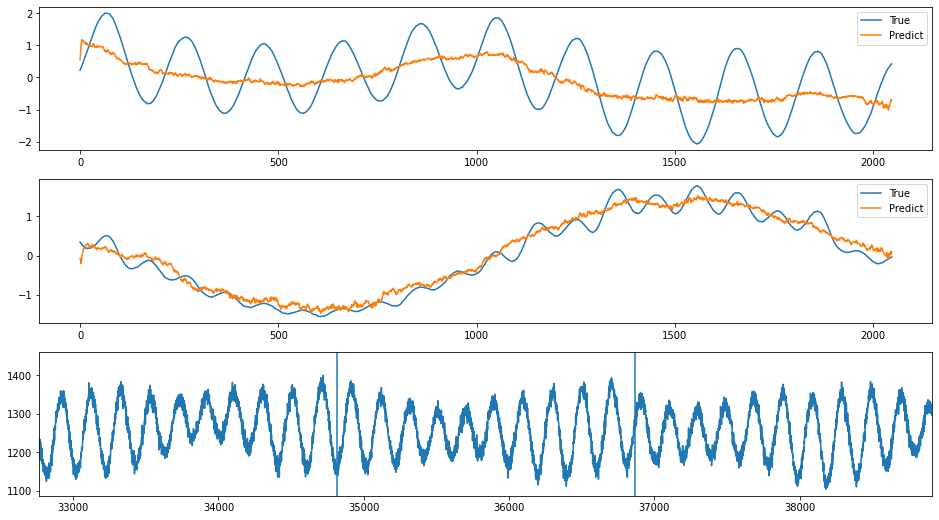

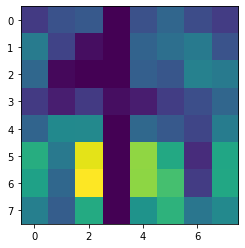

index: 197366
Error: 0.3852789709007277
type                                                         Inst
fill                                                         7088
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-26 04:27:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7088/...
n_bunches                                                     924
bunch_index                                                   698
bunch_number                                                  507
ts_length                                                   65536
chunk                                                          21
Name: 5483, dtype: object


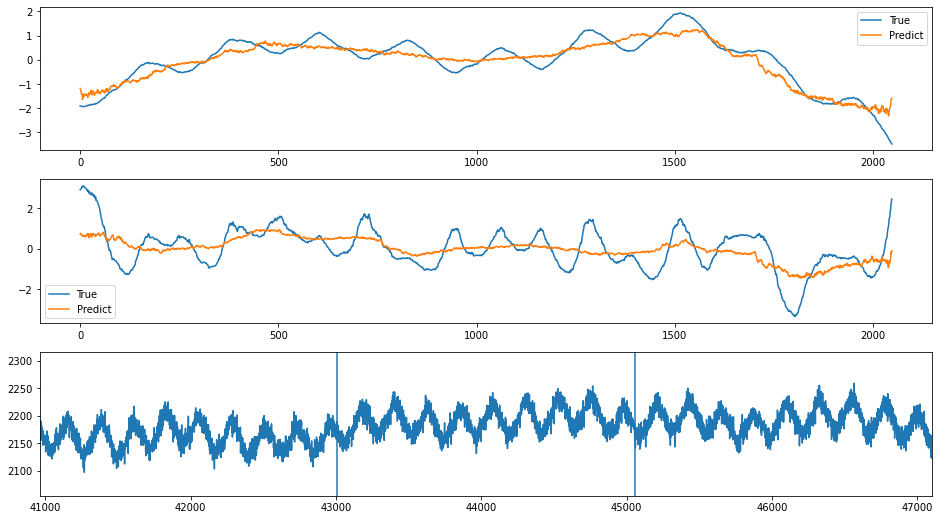

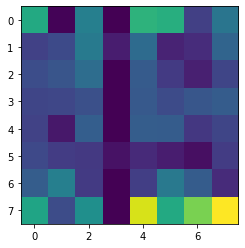

index: 100155
Error: 0.38208198506459146
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:51:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                          16
Name: 4189, dtype: object


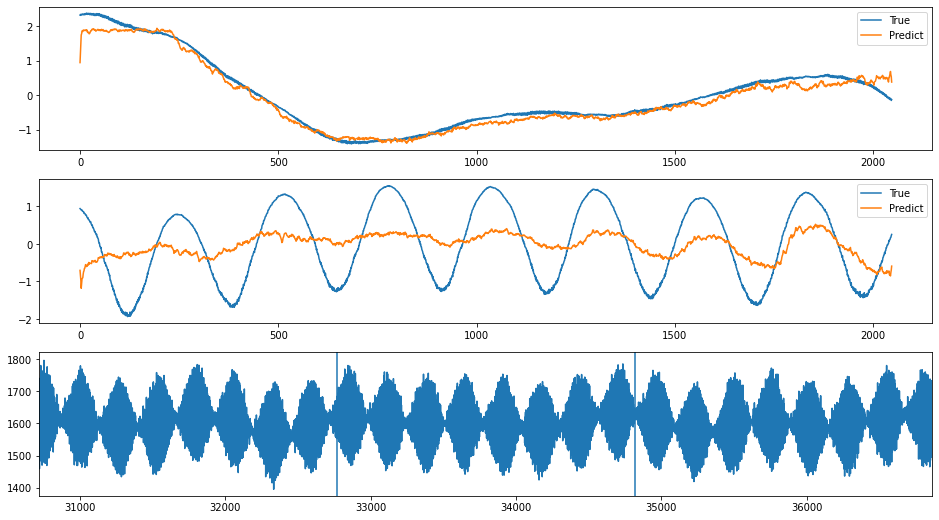

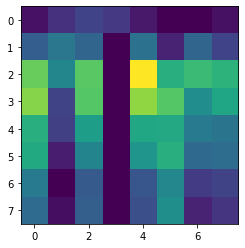

index: 361657
Error: 0.378229836646414
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 08:15:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                     428
bunch_index                                                   227
bunch_number                                                  113
ts_length                                                   65536
chunk                                                          25
Name: 6412, dtype: object


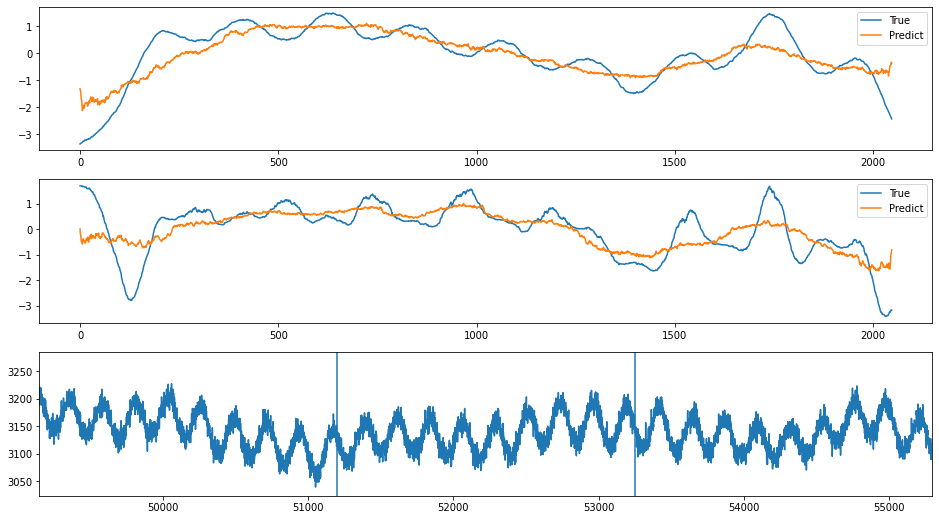

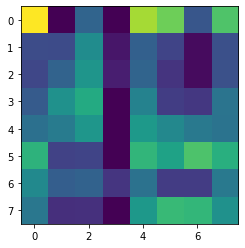

index: 317625
Error: 0.37747816178684834
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:54:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   556
bunch_number                                                   59
ts_length                                                   65536
chunk                                                          23
Name: 5962, dtype: object


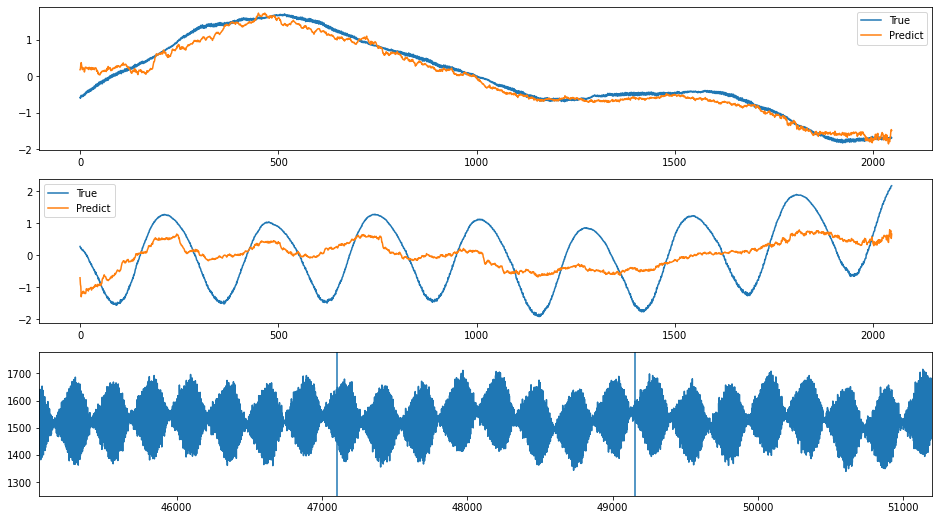

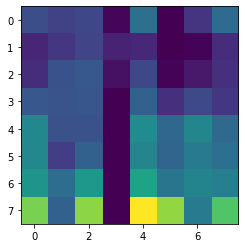

index: 312899
Error: 0.3767162466659508
type                                                         Inst
fill                                                         6273
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 17:35:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6273/...
n_bunches                                                     196
bunch_index                                                     2
bunch_number                                                    2
ts_length                                                   65536
chunk                                                          26
Name: 6681, dtype: object


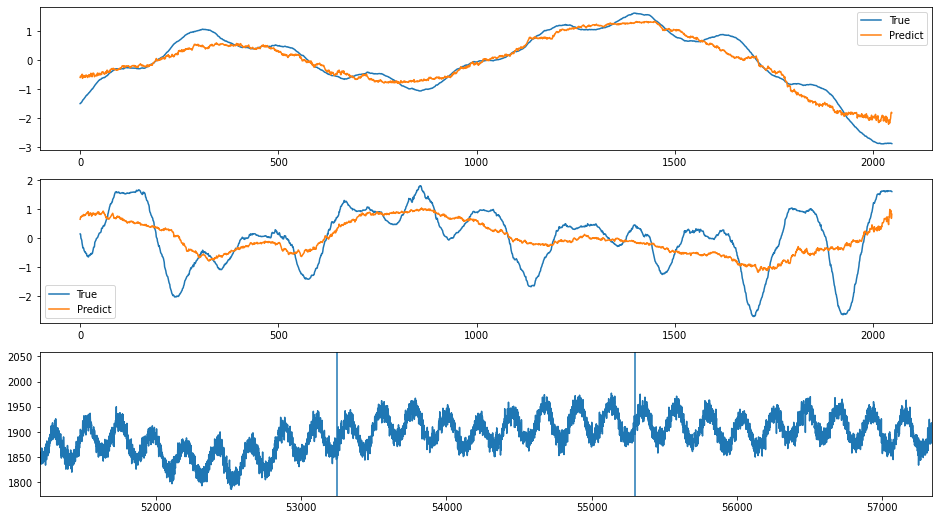

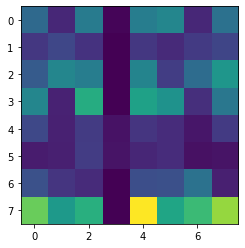

index: 235485
Error: 0.37606910651002534
type                                                         Inst
fill                                                         6695
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-17 20:34:32
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6695/...
n_bunches                                                    1068
bunch_index                                                  1310
bunch_number                                                  937
ts_length                                                   65536
chunk                                                           0
Name: 105, dtype: object


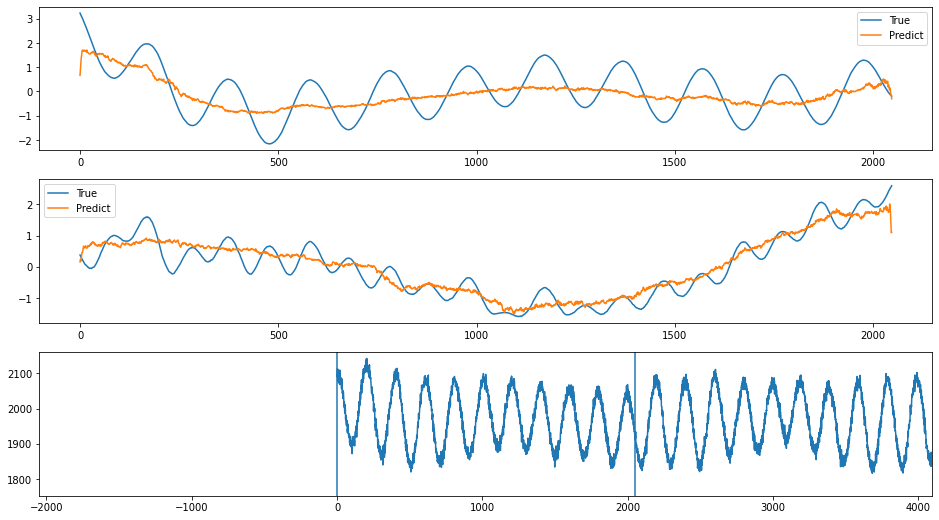

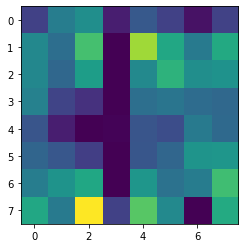

index: 195505
Error: 0.37489818242024775
type                                                         Inst
fill                                                         6268
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-03 12:25:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6268/...
n_bunches                                                     300
bunch_index                                                   205
bunch_number                                                  105
ts_length                                                   65536
chunk                                                          15
Name: 3905, dtype: object


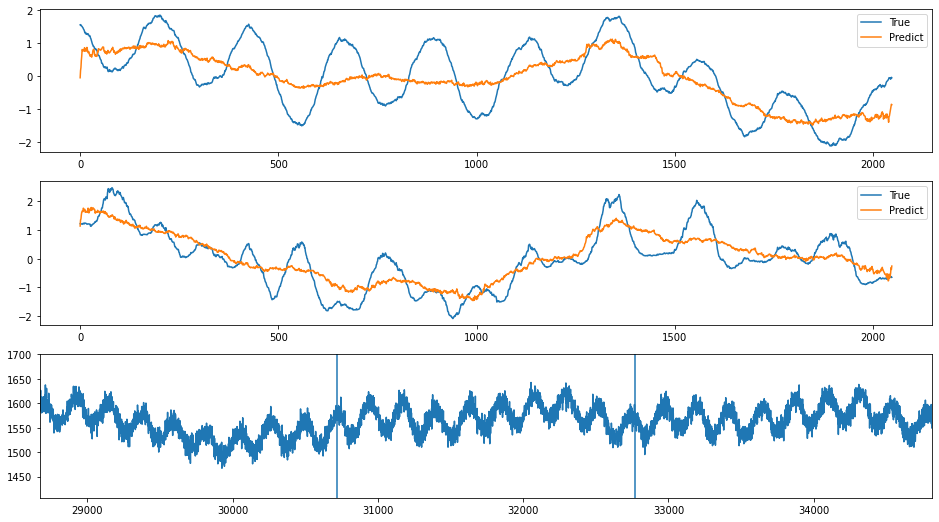

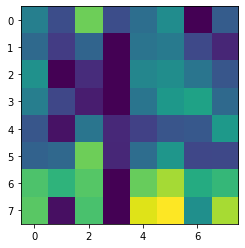

index: 342746
Error: 0.37424531679102874
type                                                         Inst
fill                                                         6693
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 20:12:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6693/...
n_bunches                                                     444
bunch_index                                                    87
bunch_number                                                   39
ts_length                                                   65536
chunk                                                           8
Name: 2091, dtype: object


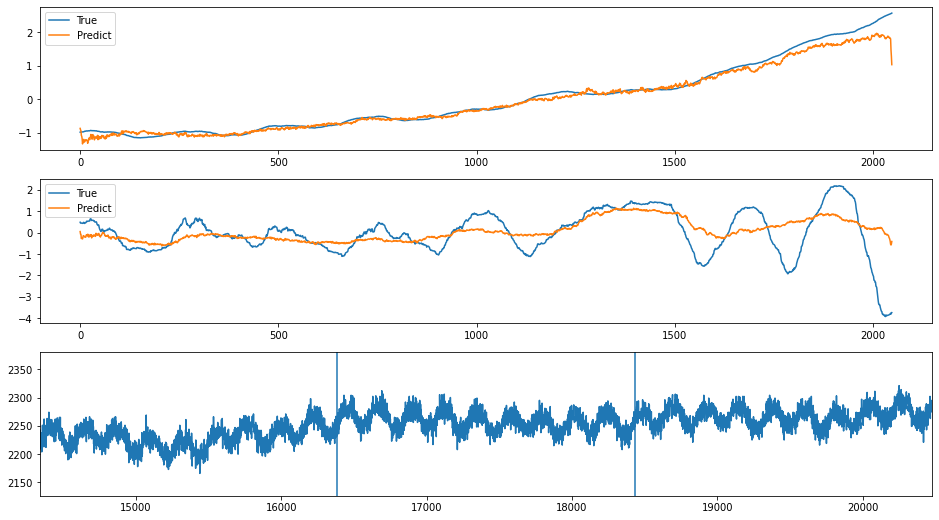

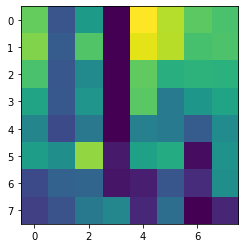

index: 326127
Error: 0.37398432148100424
type                                                         Inst
fill                                                         6217
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 10:31:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6217/...
n_bunches                                                      61
bunch_index                                                   110
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          18
Name: 4651, dtype: object


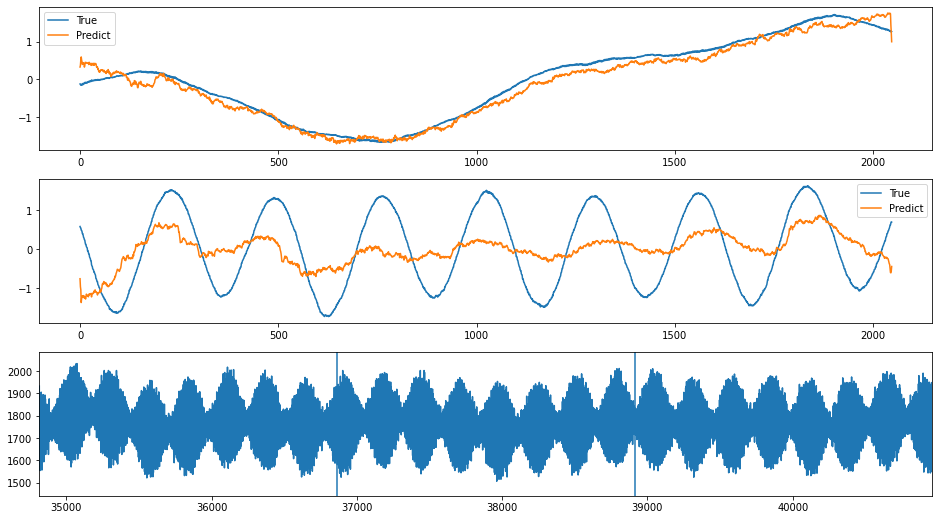

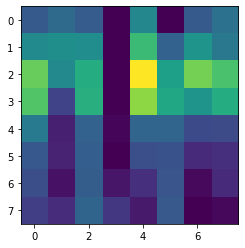

index: 22568
Error: 0.3704691084721521
type                                                         Inst
fill                                                         7282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-12 06:56:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7282/...
n_bunches                                                       6
bunch_index                                                  1018
bunch_number                                                    2
ts_length                                                   65536
chunk                                                          26
Name: 6888, dtype: object


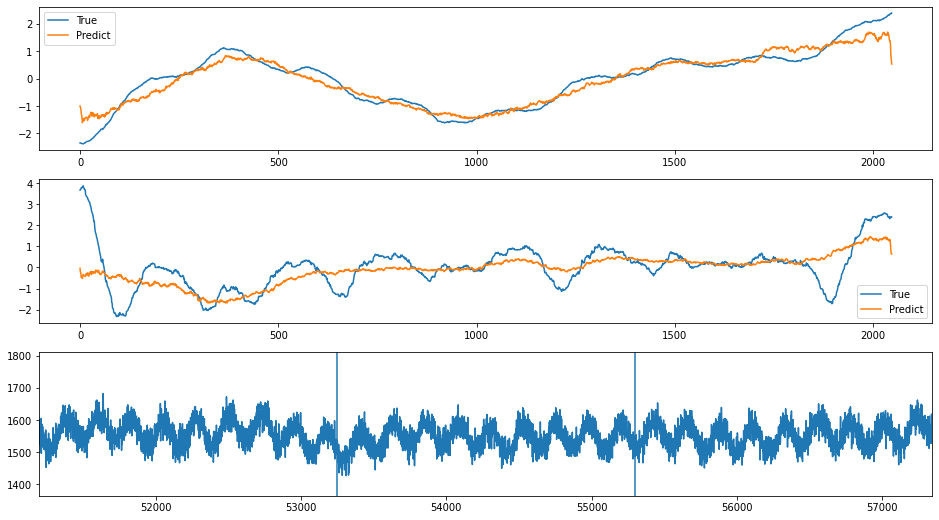

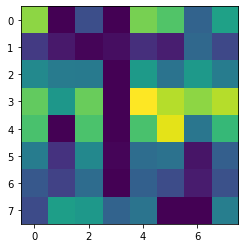

index: 329760
Error: 0.36911794615957566
type                                                         Inst
fill                                                         6363
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-05 20:58:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6363/...
n_bunches                                                    1132
bunch_index                                                  2089
bunch_number                                                 1128
ts_length                                                   65536
chunk                                                          17
Name: 4384, dtype: object


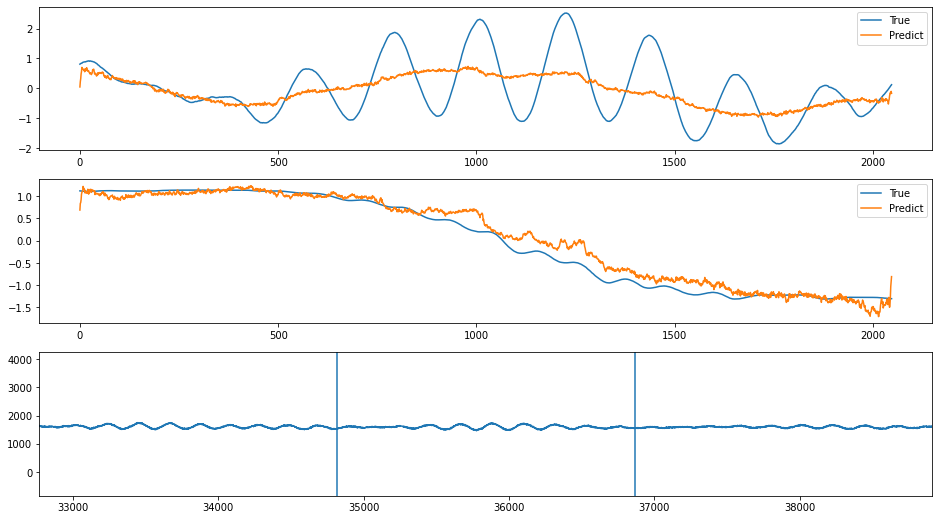

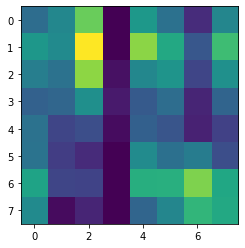

index: 158727
Error: 0.3678499330220013
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:59:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                    69
bunch_number                                                   10
ts_length                                                   65536
chunk                                                          17
Name: 4545, dtype: object


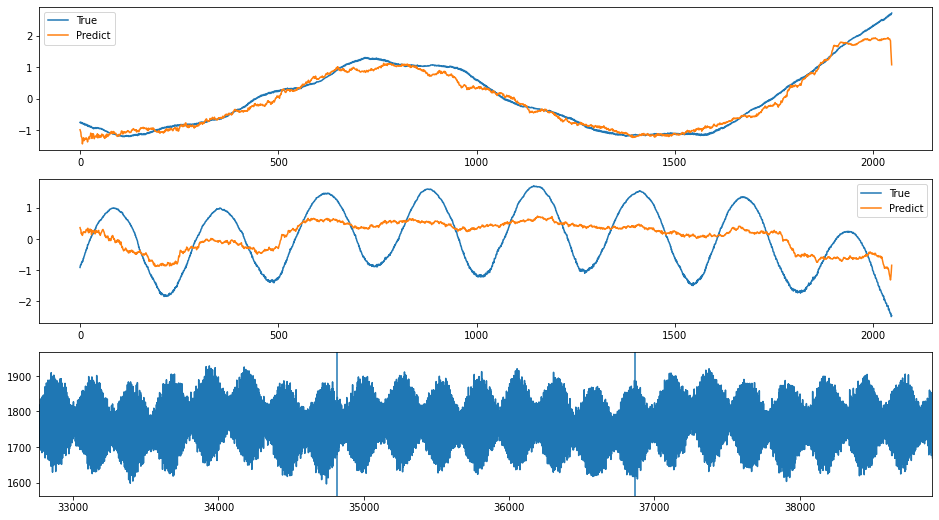

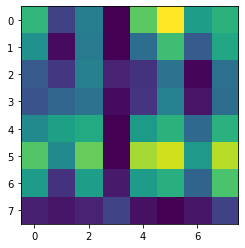

index: 100645
Error: 0.3676261222279035
type                                                         Inst
fill                                                         7108
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-31 04:54:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7108/...
n_bunches                                                     924
bunch_index                                                   327
bunch_number                                                  226
ts_length                                                   65536
chunk                                                          17
Name: 4428, dtype: object


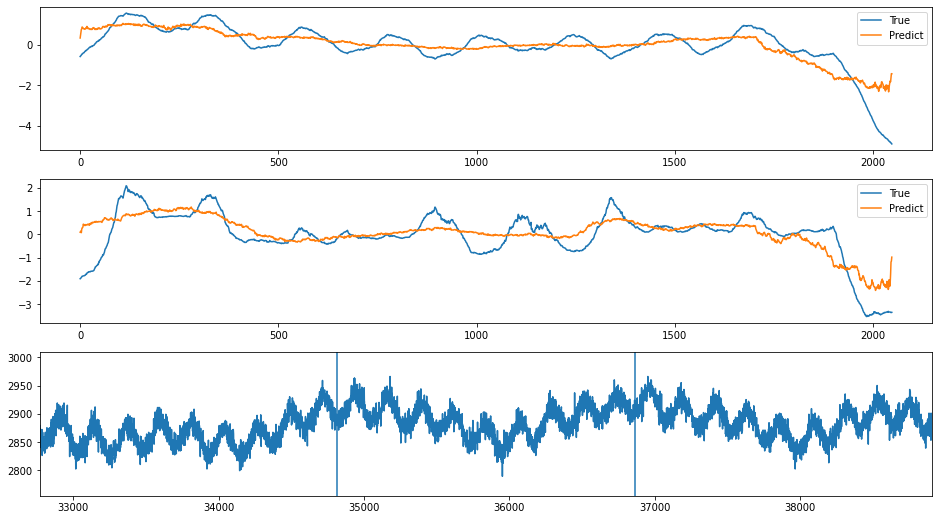

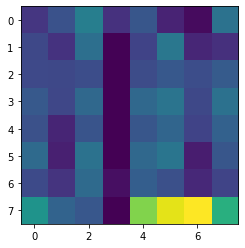

index: 97013
Error: 0.365362203694324
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 22:51:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                           3
Name: 861, dtype: object


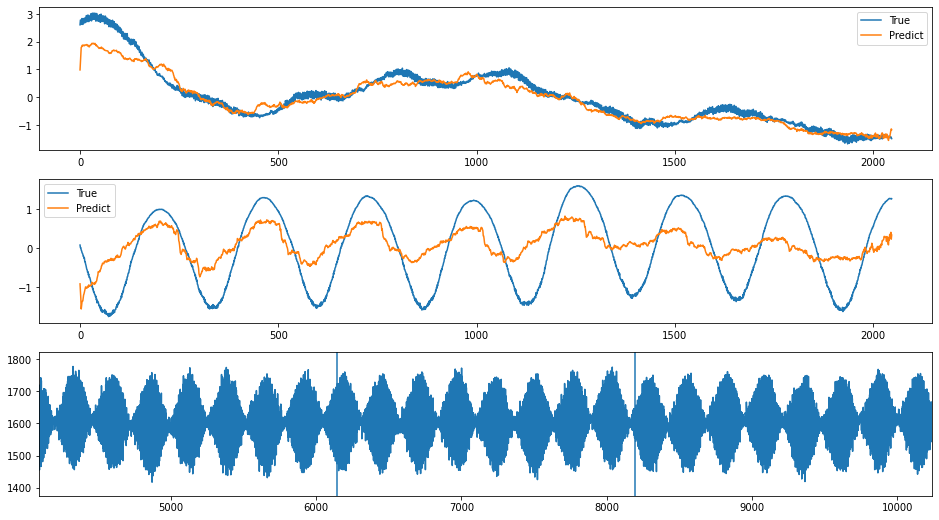

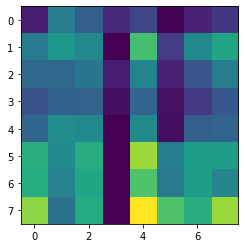

index: 109639
Error: 0.36347808734560433
type                                                         Inst
fill                                                         7304
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-15 02:42:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7304/...
n_bunches                                                      75
bunch_index                                                  1634
bunch_number                                                   32
ts_length                                                   65536
chunk                                                          26
Name: 6677, dtype: object


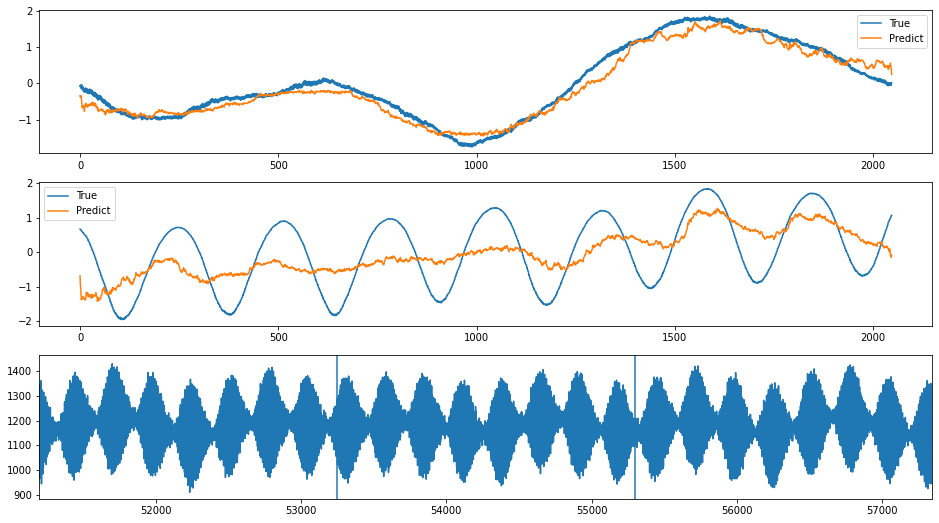

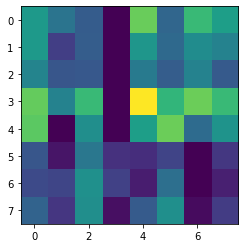

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 343416
Error: 0.014349843664226968
type                                                         Inst
fill                                                         7309
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-16 13:48:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7309/...
n_bunches                                                    1068
bunch_index                                                  1219
bunch_number                                                  896
ts_length                                                   65536
chunk                                                          26
Name: 6748, dtype: object


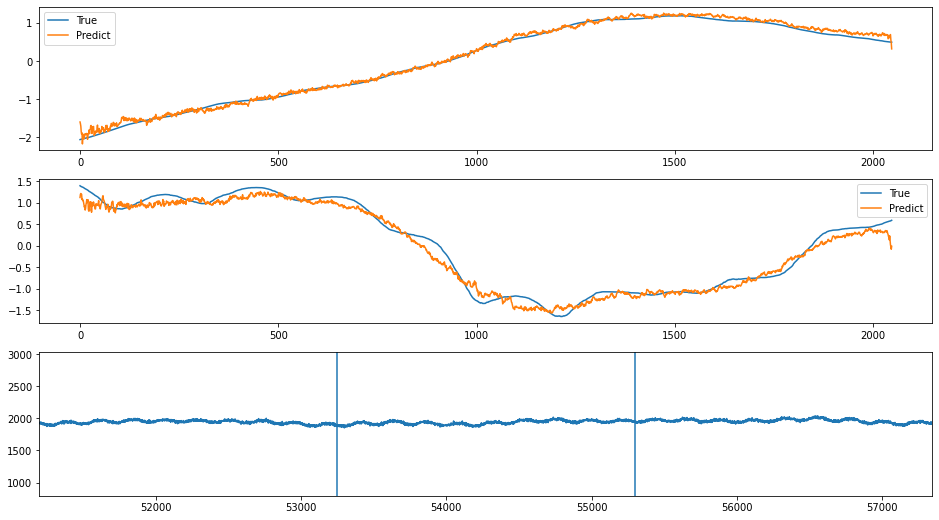

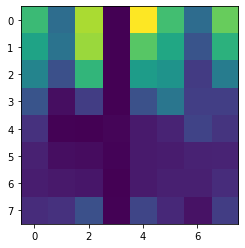

index: 114364
Error: 0.014349706929640903
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 19:22:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                  2395
bunch_number                                                 1270
ts_length                                                   65536
chunk                                                          15
Name: 4040, dtype: object


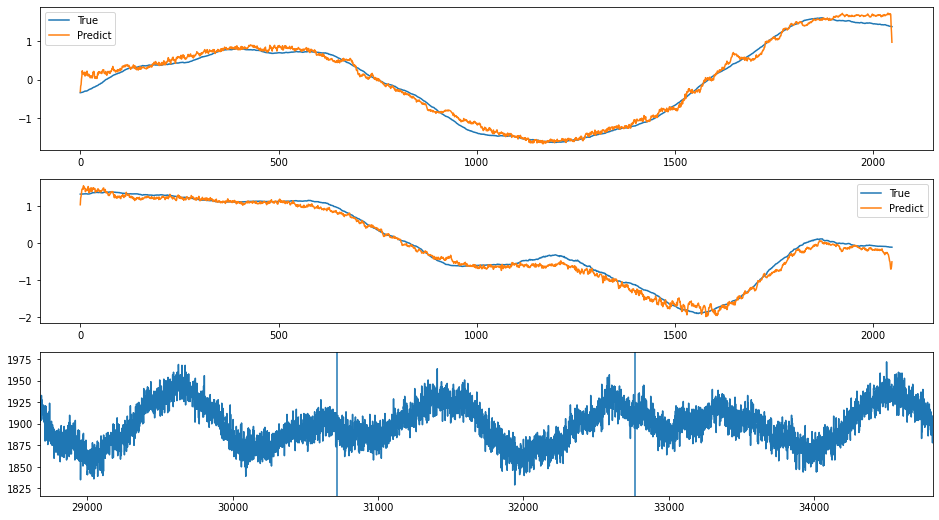

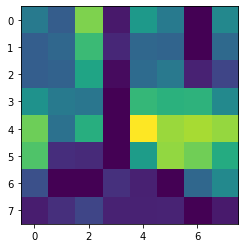

index: 96548
Error: 0.014349925487467875
type                                                         Inst
fill                                                         6396
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-17 13:11:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6396/...
n_bunches                                                    1292
bunch_index                                                   576
bunch_number                                                  232
ts_length                                                   65536
chunk                                                          17
Name: 4389, dtype: object


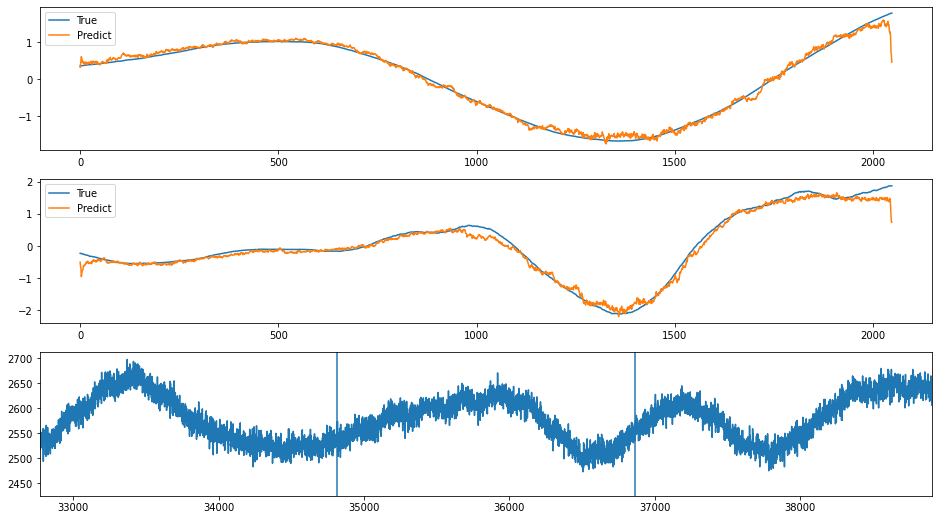

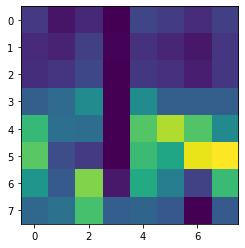

index: 365859
Error: 0.014349949141766327
type                                                         Inst
fill                                                         6341
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 01:13:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6341/...
n_bunches                                                    1868
bunch_index                                                  2078
bunch_number                                                 1121
ts_length                                                   65536
chunk                                                          25
Name: 6575, dtype: object


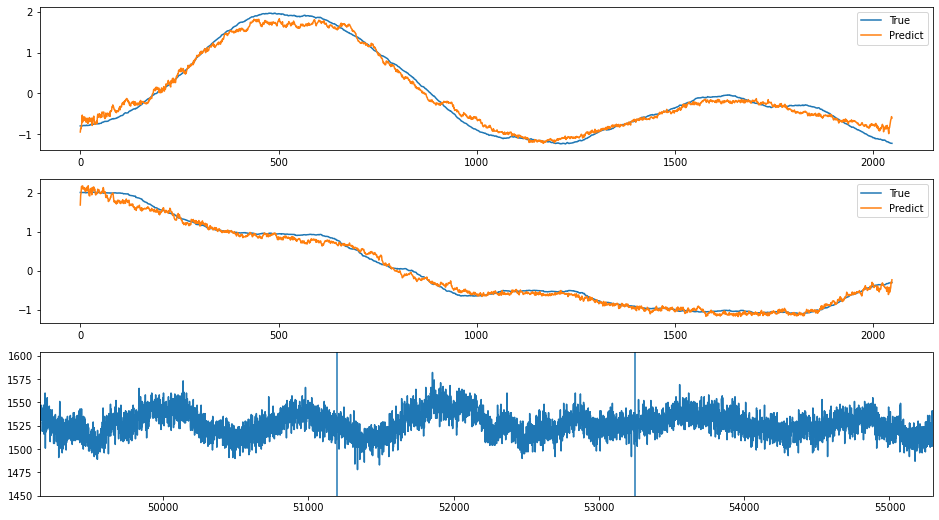

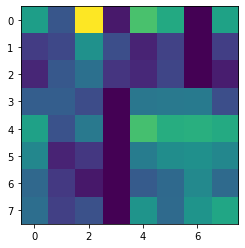

index: 184214
Error: 0.01435000328750326
type                                                         Inst
fill                                                         7058
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-17 18:33:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7058/...
n_bunches                                                    2556
bunch_index                                                  1942
bunch_number                                                 1442
ts_length                                                   65536
chunk                                                           9
Name: 2324, dtype: object


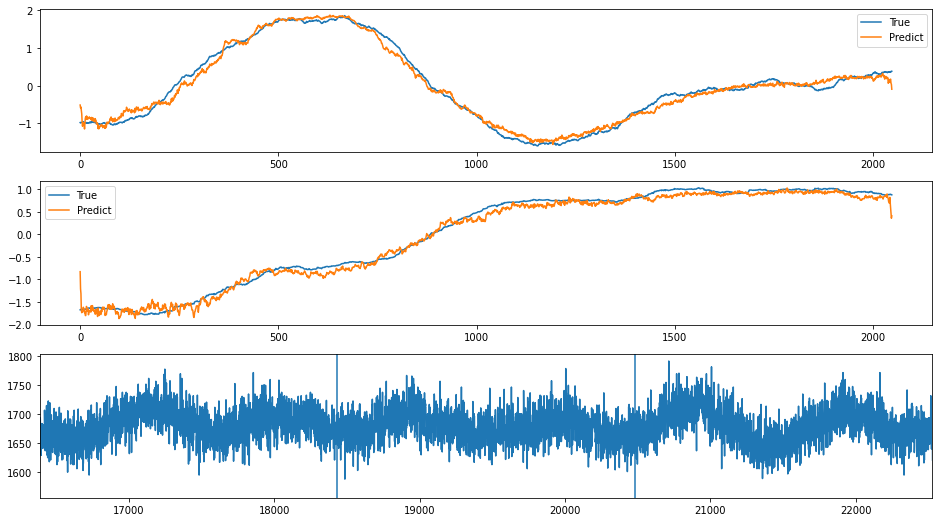

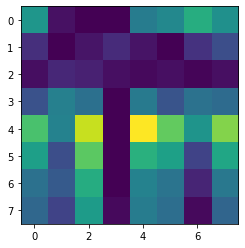

index: 76812
Error: 0.014349544392383375
type                                                         Inst
fill                                                         6186
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-10 20:00:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6186/...
n_bunches                                                    1916
bunch_index                                                  3128
bunch_number                                                 1727
ts_length                                                   65536
chunk                                                          26
Name: 6769, dtype: object


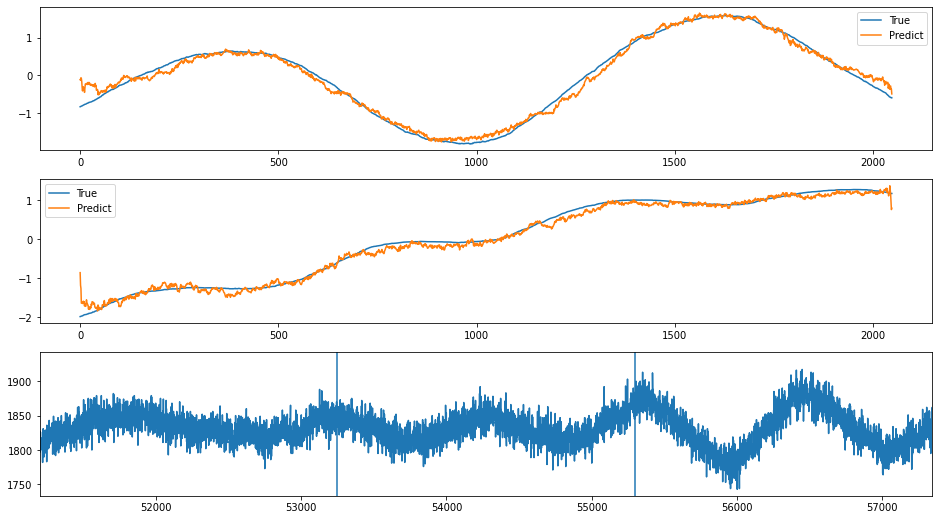

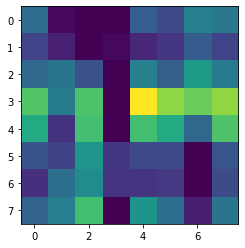

index: 334343
Error: 0.014349507963490623
type                                                         Inst
fill                                                         7052
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-13 17:38:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7052/...
n_bunches                                                    2556
bunch_index                                                  2709
bunch_number                                                 2001
ts_length                                                   65536
chunk                                                          23
Name: 6028, dtype: object


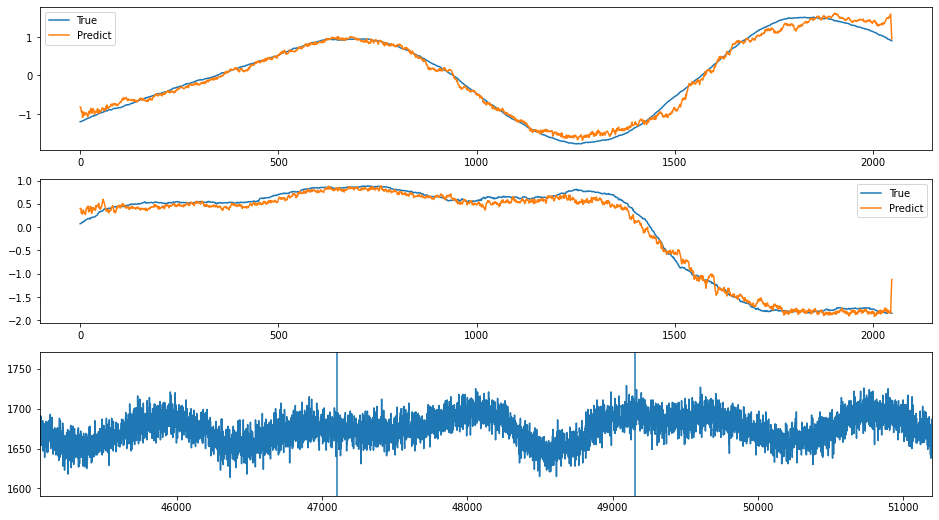

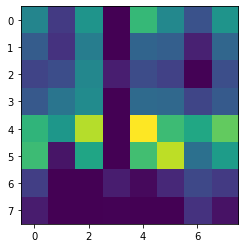

index: 28824
Error: 0.01434949570217723
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 01:29:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                     876
bunch_index                                                  1552
bunch_number                                                  822
ts_length                                                   65536
chunk                                                          27
Name: 6980, dtype: object


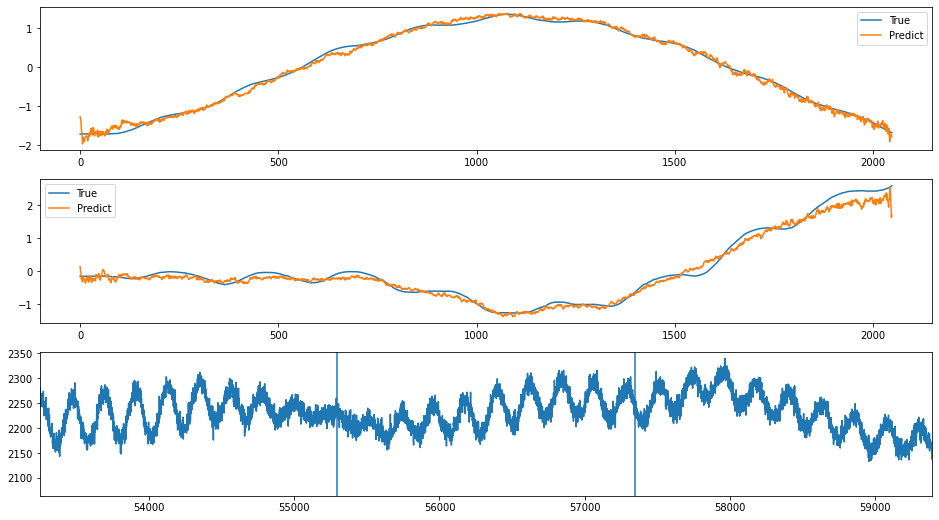

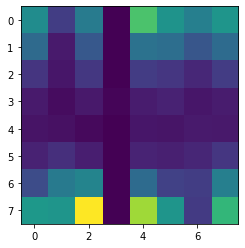

index: 279758
Error: 0.014350150235559415
type                                                         Inst
fill                                                         6615
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-26 22:34:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6615/...
n_bunches                                                     603
bunch_index                                                   454
bunch_number                                                   72
ts_length                                                   65536
chunk                                                          12
Name: 3129, dtype: object


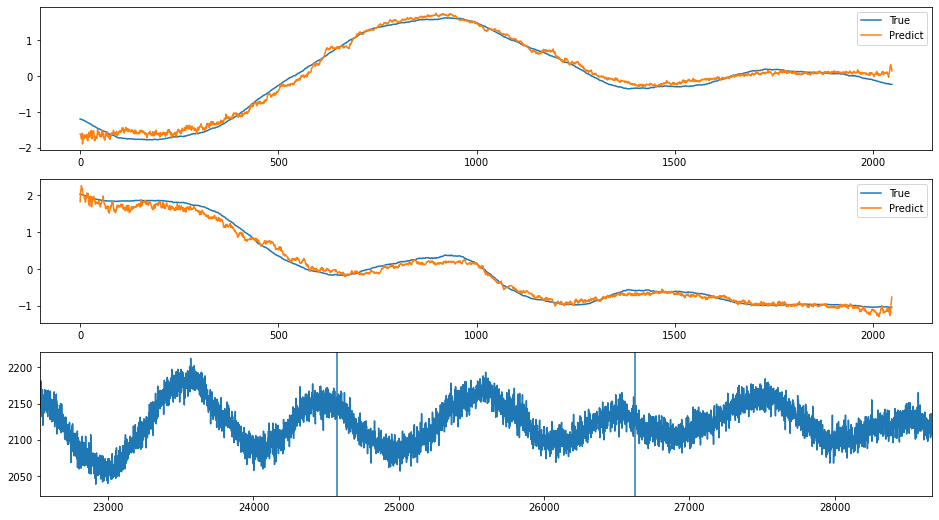

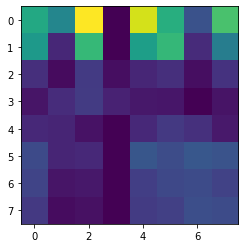

index: 354570
Error: 0.014349345357107956
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-06 06:02:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  1363
bunch_number                                                  739
ts_length                                                   65536
chunk                                                          17
Name: 4352, dtype: object


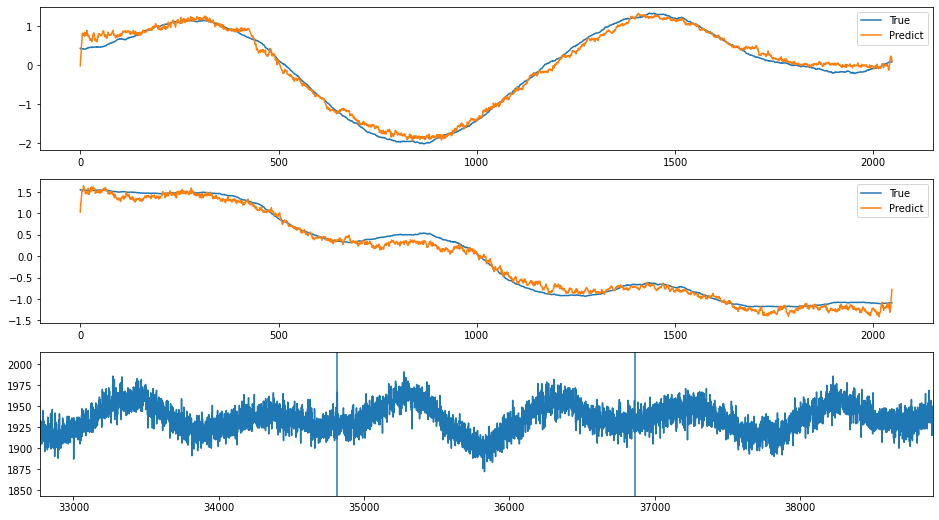

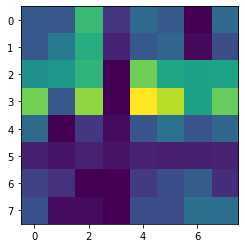

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
encoded = checker.encode(encoding_true)
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [34]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

In [35]:
import sklearn
from sklearn.manifold import TSNE

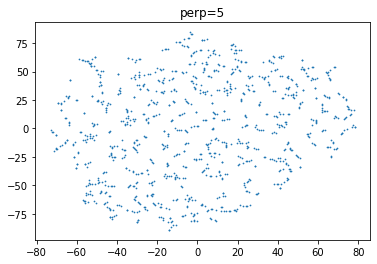

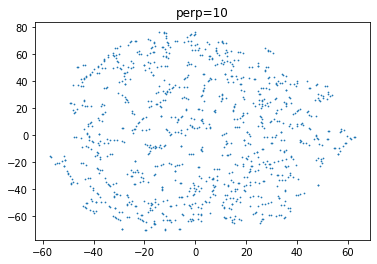

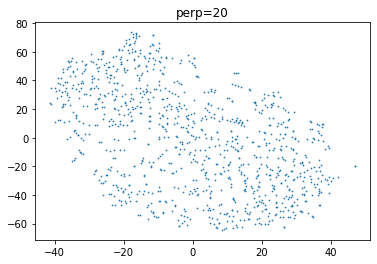

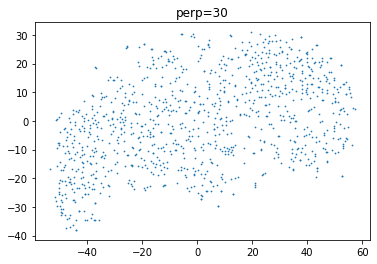

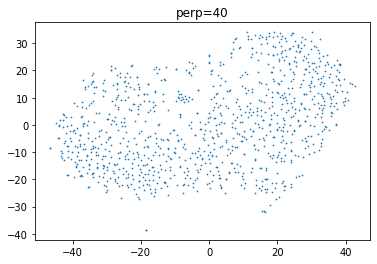

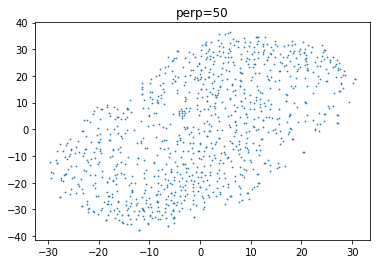

In [36]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [37]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

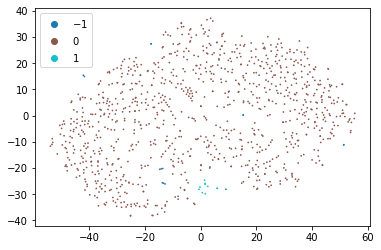

cluster -1
N samples: 14


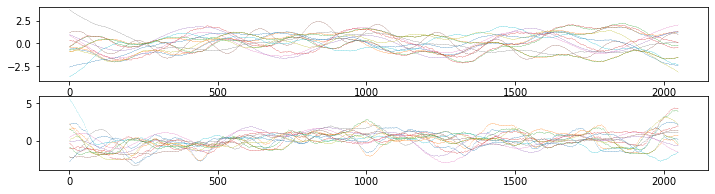

cluster 0
N samples: 1000


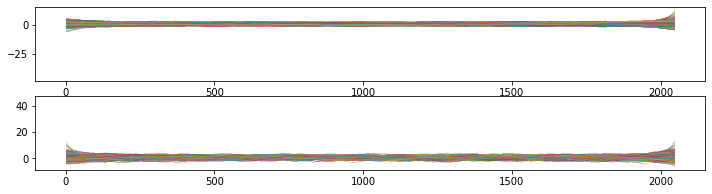

cluster 1
N samples: 10


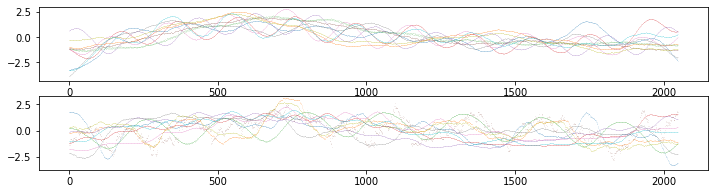

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()